#Regresión

GRUPO 04 - Integrantes:

- Agustin Braida
- Ignacio Carrera
- Matias Etchegoyen
- Agustin Trombetta
- Tomas Ghiglione

#Exploración Inicial

## Carga Dataset

In [1212]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as skp

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

pd.options.display.max_columns = None

In [1213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1214]:
path = '/content/drive/MyDrive/Ciencia de datos/tp1/listings.csv'
airbnb = pd.read_csv(path)

In [1215]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5269,https://www.airbnb.com/rooms/5269,20250306035046,2025-03-14,city scrape,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI","Lea, born and raised on the Island of Hawaii, ...",within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/16ac6...,https://a0.muscache.com/im/pictures/user/16ac6...,Island of Hawaiʻi,3.0,6.0,"['email', 'phone']",t,t,Neighborhood highlights,South Kohala,Hawaii,20.02740,-155.70200,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",$128.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,8,8,8,8,2025-03-14,40,6,1,0,6,36,4608.0,2011-05-31,2025-02-25,4.78,4.88,4.55,4.95,4.85,5.00,4.85,119-269-5808-01R,f,3,3,0,0,0.24
1,5387,https://www.airbnb.com/rooms/5387,20250306035046,2025-03-15,city scrape,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI","Kona Hawaii,\n \n Ed is a Farmer/Designer \n\n...",within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/b895b...,https://a0.muscache.com/im/pictures/user/b895b...,Kailua/Kona,2.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,South Kona,Hawaii,19.43081,-155.88069,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,2.0,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",$97.00,5,60,5,5,1125,1125,5.0,1125.0,NaN,t,2,22,48,250,2025-03-15,231,13,0,207,14,130,12610.0,2010-02-16,2025-01-14,4.67,4.69,4.42,4.85,4.88,4.74,4.78,TA-163-133-0304-01,t,2,2,0,0,1.26
2,5480,https://www.airbnb.com/rooms/5480,20250306035046,2025-03-14,city scrape,Isle Of You Naturally Farm Retreat,The Best Choice for your Clothing Optional Nud...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI","a decade ago, my husband bailed on the mainla...",NaN,NaN,0%,f,https://a0.muscache.com/im/users/8145/profile_...,https://a0.muscache.com/im/users/8145/profile_...,Island of Hawaiʻi,3.0,3.0,"['email', 'phone']",t,f,Neighborhood highlights,Puna,Hawaii,19.44149,-154.91527,Private room in cabin,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Kitchen"", ""Host greets you"", ""Breakfast

In [1216]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36125 non-null  int64  
 1   listing_url                                   36125 non-null  object 
 2   scrape_id                                     36125 non-null  int64  
 3   last_scraped                                  36125 non-null  object 
 4   source                                        36125 non-null  object 
 5   name                                          36125 non-null  object 
 6   description                                   34983 non-null  object 
 7   neighborhood_overview                         17428 non-null  object 
 8   picture_url                                   36125 non-null  object 
 9   host_id                                       36125 non-null 

In [1217]:
airbnbFilter = airbnb.copy()
airbnbFilter['price'] = airbnbFilter['price'].replace('[$,]', '', regex=True).astype(float)

## Análisis inicial del dataset

In [1218]:
airbnbFilter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36125 non-null  int64  
 1   listing_url                                   36125 non-null  object 
 2   scrape_id                                     36125 non-null  int64  
 3   last_scraped                                  36125 non-null  object 
 4   source                                        36125 non-null  object 
 5   name                                          36125 non-null  object 
 6   description                                   34983 non-null  object 
 7   neighborhood_overview                         17428 non-null  object 
 8   picture_url                                   36125 non-null  object 
 9   host_id                                       36125 non-null 

Vemos que el dataset tiene una gran cantidad de variables. Por lo tanto vamos hacer un análisis para hacer una limpieza inicial del dataset teneiendo en cuenta el problema a resolver.

###Análisis de variables numéricas

Determinamos la correlación de las variables numericas con el precio para ver su relevancia

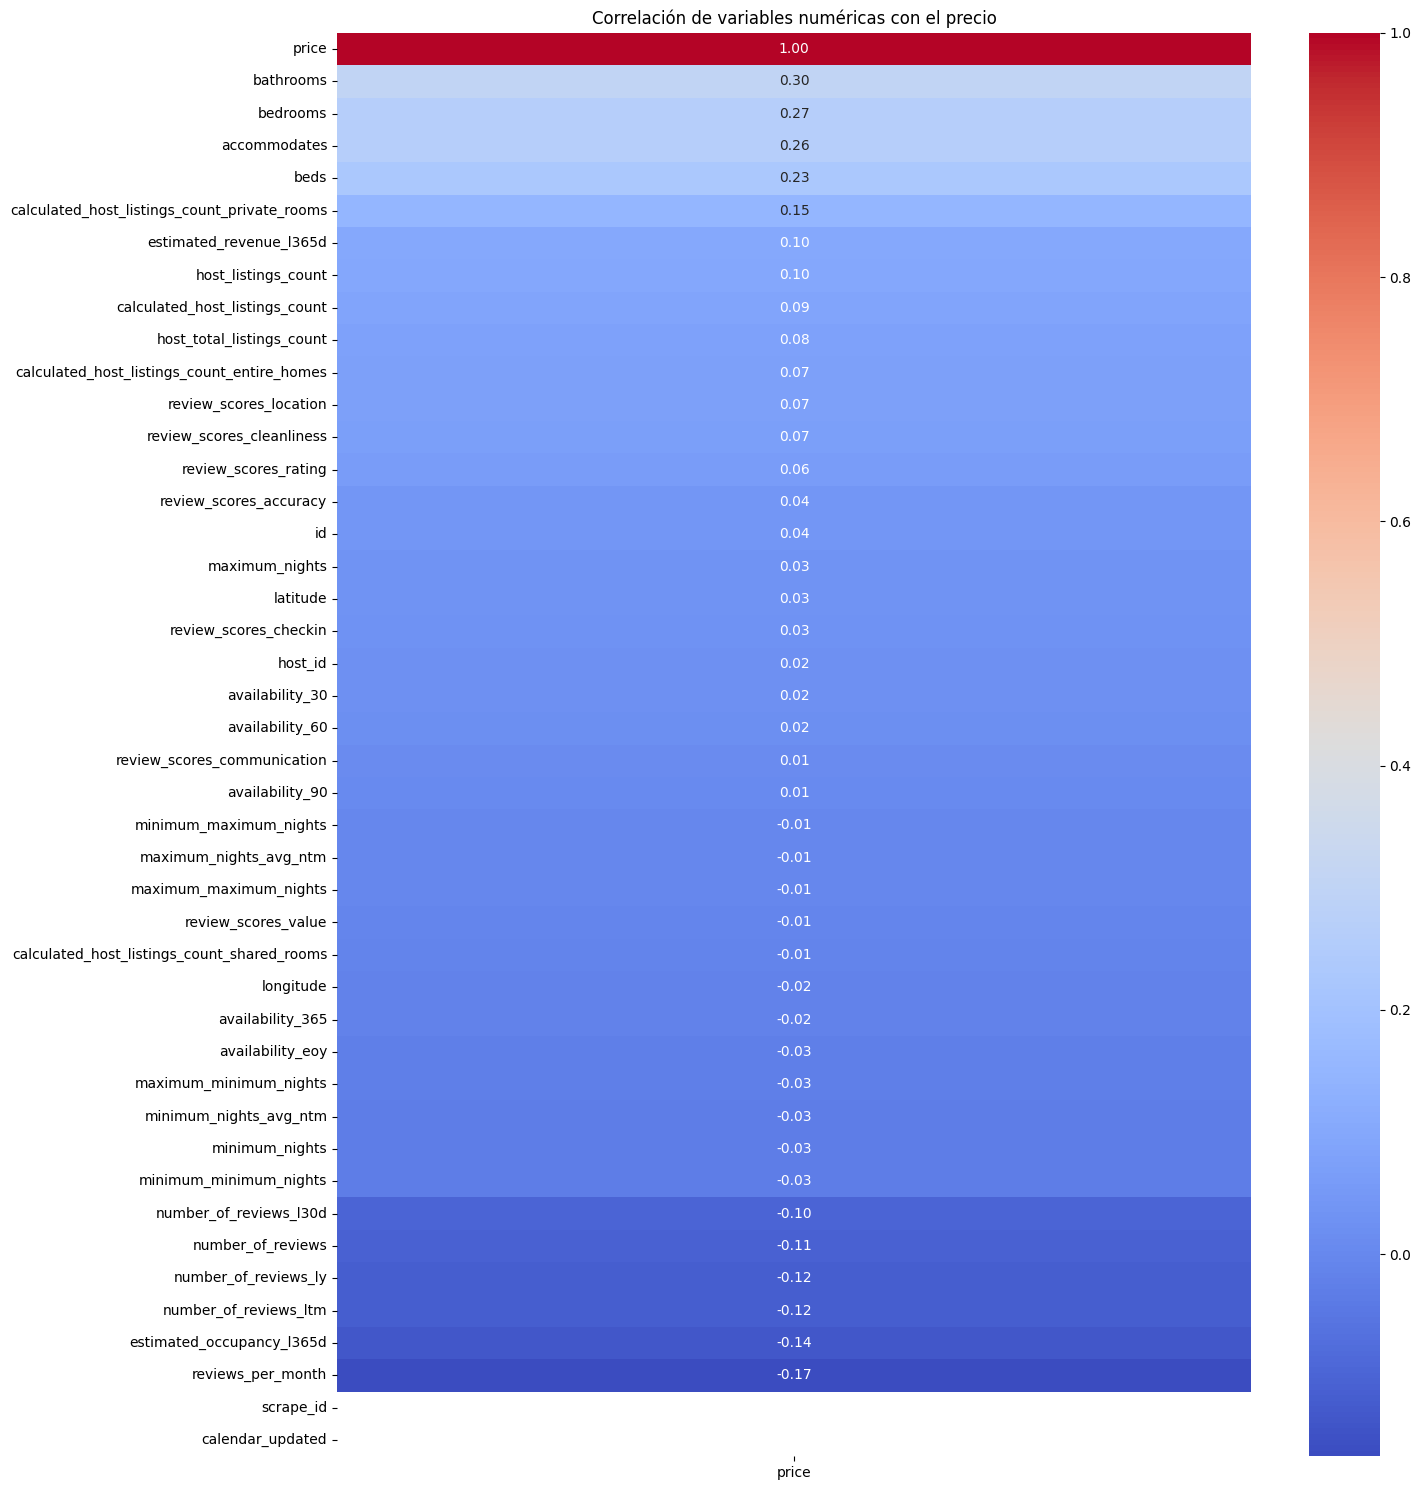

In [1219]:
matriz_corr = airbnbFilter.corr(numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_corr[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de variables numéricas con el precio')
plt.tight_layout()
plt.show()

In [1220]:
correlaciones_price = matriz_corr["price"]
correlaciones_debiles = correlaciones_price[(correlaciones_price > -0.10) & (correlaciones_price < 0.10)]
print(correlaciones_debiles)

id                                             0.040693
host_id                                        0.024629
host_listings_count                            0.096748
host_total_listings_count                      0.077511
latitude                                       0.033354
longitude                                     -0.015439
minimum_nights                                -0.031257
maximum_nights                                 0.033771
minimum_minimum_nights                        -0.031304
maximum_minimum_nights                        -0.025827
minimum_maximum_nights                        -0.005362
maximum_maximum_nights                        -0.005963
minimum_nights_avg_ntm                        -0.029390
maximum_nights_avg_ntm                        -0.005761
availability_30                                0.023474
availability_60                                0.019512
availability_90                                0.006697
availability_365                              -0

Se decide eliminar todas las columnas con correlaciones debiles salvo ("id", "host_is_superhost", "latitude", "longitude", "minimum_nights", "maximun_nights", "has_description") ya que se considera que pueden tener alguna utilidad.

In [1221]:
columnas_conservar = ["id", "host_id", "host_is_superhost", "latitude", "longitude", "minimum_nights", "maximum_nights", "has_description", 'review_scores_rating']
columnas_eliminar = [col for col in correlaciones_debiles.index if col not in columnas_conservar]
airbnbFilter = airbnbFilter.drop(columns = columnas_eliminar)
print(f"Variables eliminadas: {columnas_eliminar}")

Variables eliminadas: ['host_listings_count', 'host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'availability_eoy', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_shared_rooms']


 Se considera que "number_of_reviews_ltm", "number_of_reviews_l30d", "number_of_reviews_ly" es información redundate, con tener el total es suficiente. Por lo tanto se eliminan.

In [1222]:
airbnbFilter = airbnbFilter.drop(columns=["number_of_reviews_ltm", "number_of_reviews_l30d", "number_of_reviews_ly"])

In [1223]:
airbnbFilter.select_dtypes(include=['number']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36125 non-null  int64  
 1   scrape_id                                     36125 non-null  int64  
 2   host_id                                       36125 non-null  int64  
 3   latitude                                      36125 non-null  float64
 4   longitude                                     36125 non-null  float64
 5   accommodates                                  36125 non-null  int64  
 6   bathrooms                                     31580 non-null  float64
 7   bedrooms                                      35509 non-null  float64
 8   beds                                          31551 non-null  float64
 9   price                                         31544 non-null 

Podemos ver que la columna calendar_updated tiene todos valores nulos, por lo que no aporta ningún tipo de información. Por lo tanto se elimina.

In [1224]:
airbnbFilter = airbnbFilter.drop(columns='calendar_updated')
airbnbFilter.reset_index(drop=True,inplace=True)

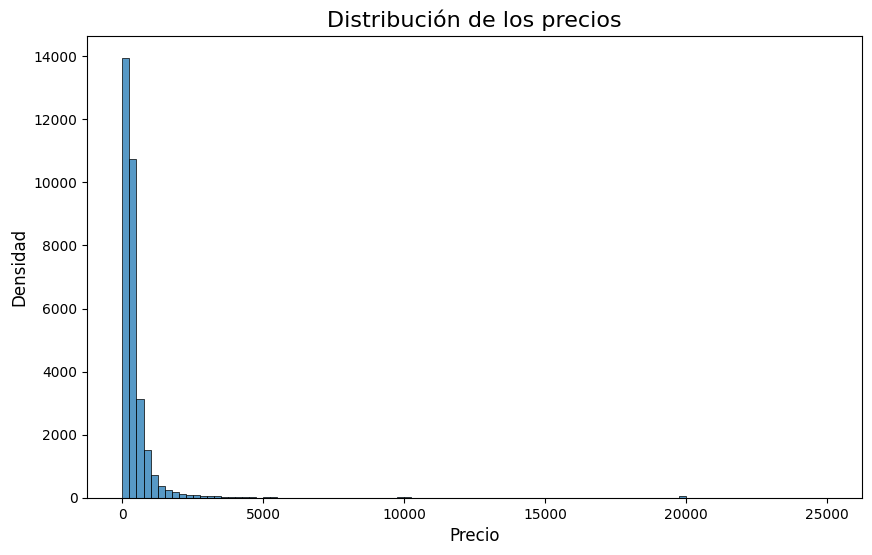

In [1225]:
plt.figure(figsize=(10, 6))
sns.histplot(airbnbFilter['price'], bins=100)

plt.title('Distribución de los precios', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

plt.show()

Hay una clara distribución sesgada a la derecha, la mayoría de los precios están concentrados en valores bajos y a medida que el precio aumenta la frecuncia disminuye considerablemente.

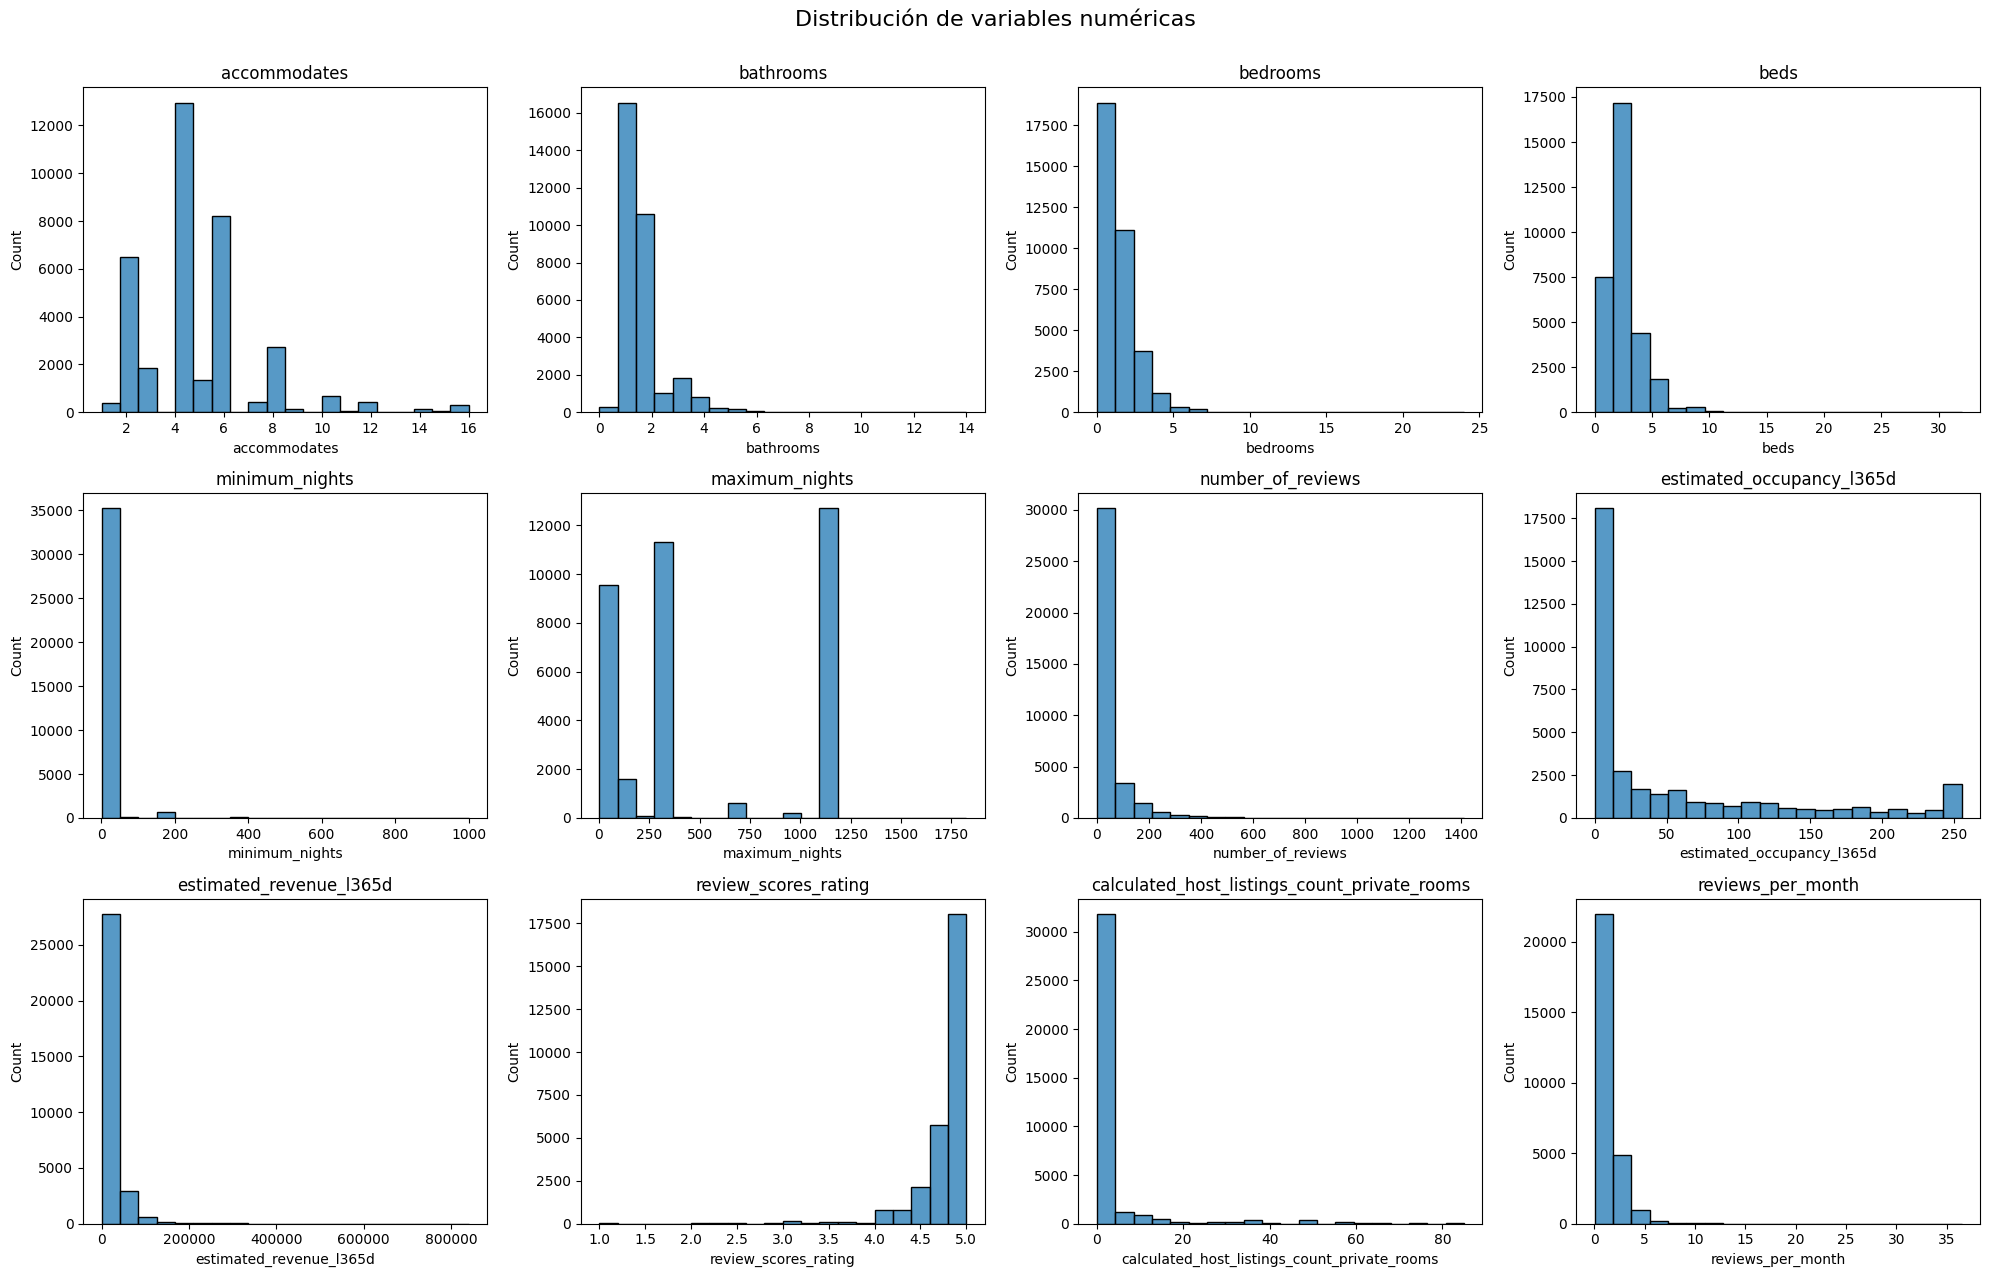

In [1226]:
variable_numericas = airbnbFilter.select_dtypes(include='number')
variable_numericas = variable_numericas.drop(columns=['id', 'host_id', 'scrape_id', 'latitude', 'longitude', 'price'])

plt.figure(figsize=(20, 20))

for i, column in enumerate(variable_numericas.columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(airbnbFilter[column], bins=20)
    plt.title(column)
    plt.tight_layout()

plt.suptitle('Distribución de variables numéricas', fontsize=16, y=1.02)
plt.show()

Vemos que la gran mayoría de las variables también tiene un sesgo a la derecha. Por lo que podemos confirmar que haya algúna correlación con 'price'.

'maximum_nights' presenta una escala de valores muy variadas, por lo que va a ser considerada una variable a escalar.

Análisis de correlaciones

<Axes: title={'center': 'Correlación entre variables numéricas'}>

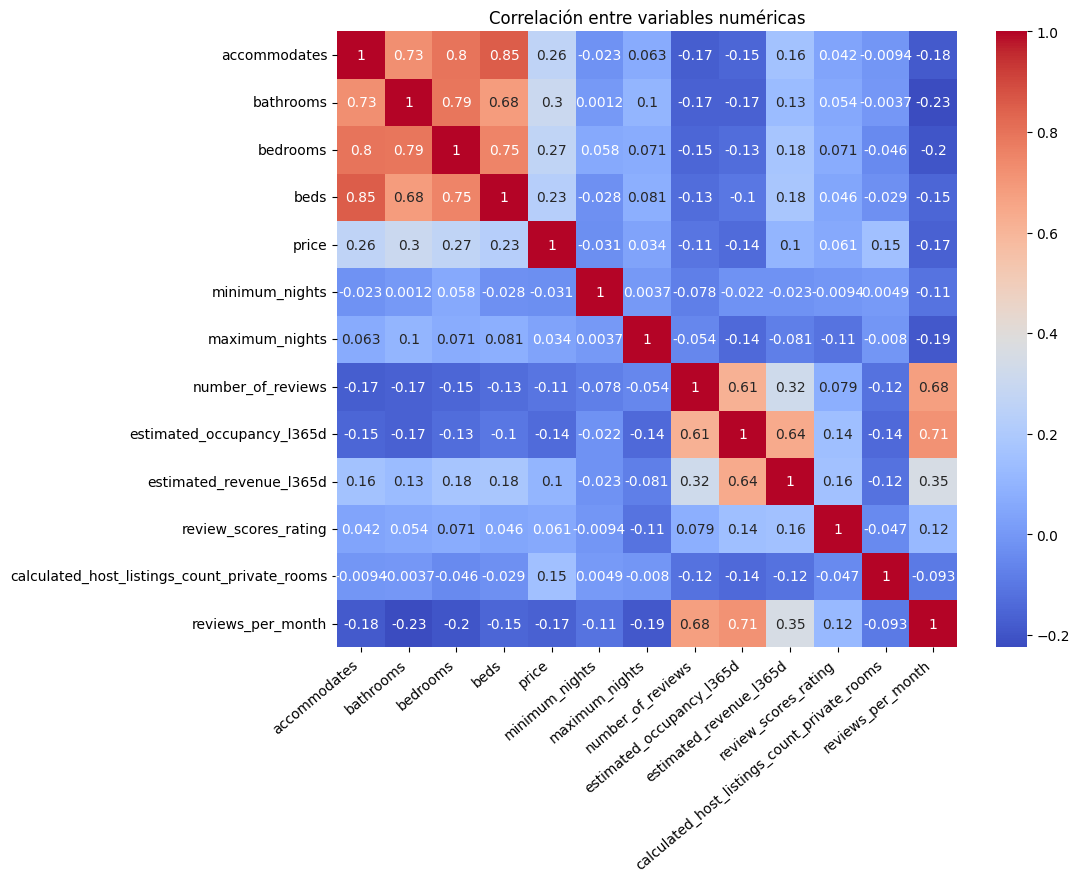

In [1227]:
var_sin_analisis = ["id", "host_id", "scrape_id", "latitude", "longitude"]

plt.figure(figsize=(10, 8))

correlaciones = sns.heatmap(data=airbnbFilter.drop(var_sin_analisis, axis=1).select_dtypes("number").corr(), annot=True, cmap="coolwarm")
correlaciones.set(title="Correlación entre variables numéricas")
correlaciones.set_xticks(correlaciones.get_xticks())
correlaciones.set_xticklabels(correlaciones.get_xticklabels(), rotation=40, ha="right")

correlaciones

Podemos ver que las variables accommodates, beds, bedrooms y bathrooms tienen una fuerte correlación entre sí. Lo cual es esperable y nos va ser útil para imputar los datos faltantes de esas columnas y realizar el análisis de outliers.

###Análisis de variables no numéricas.

In [1228]:
variables_no_numericas = airbnbFilter.select_dtypes(exclude=["number"])
variables_no_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   listing_url                   36125 non-null  object
 1   last_scraped                  36125 non-null  object
 2   source                        36125 non-null  object
 3   name                          36125 non-null  object
 4   description                   34983 non-null  object
 5   neighborhood_overview         17428 non-null  object
 6   picture_url                   36125 non-null  object
 7   host_url                      36125 non-null  object
 8   host_name                     36119 non-null  object
 9   host_since                    36119 non-null  object
 10  host_location                 26691 non-null  object
 11  host_about                    24581 non-null  object
 12  host_response_time            33326 non-null  object
 13  host_response_ra

Se considera que las siguientes variables no tienen información relevante o no se pueden transformar en información relevante para predecir el precio.

In [1229]:
variables_eliminar = ['listing_url', 'last_scraped', 'source', 'name', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url',
                'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'calendar_last_scraped'
              ]
airbnbFilter = airbnbFilter.drop(columns=variables_eliminar)

Tambíen se puede ver que las variables 'neighbourhood_cleansed' y  'neighbourhood_group_cleansed' no tienen valores nulos. Por lo tanto la latitud y longitud no vas a ser necesarias.

In [1230]:
variables_eliminar = ['latitude', 'longitude']
airbnbFilter = airbnbFilter.drop(columns=variables_eliminar)

airbnbFilter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36125 non-null  int64  
 1   scrape_id                                     36125 non-null  int64  
 2   description                                   34983 non-null  object 
 3   neighborhood_overview                         17428 non-null  object 
 4   host_id                                       36125 non-null  int64  
 5   host_is_superhost                             35451 non-null  object 
 6   neighbourhood                                 17428 non-null  object 
 7   neighbourhood_cleansed                        36125 non-null  object 
 8   neighbourhood_group_cleansed                  36125 non-null  object 
 9   property_type                                 36125 non-null 

# Datos Faltantes

In [1231]:
numeric_df = airbnbFilter.select_dtypes(include=['int64', 'float64'])

analizo cantidad de faltantes o NaN

In [1232]:
missing_percent = (airbnbFilter.isna().sum() / airbnbFilter.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

neighborhood_overview      51.756401
neighbourhood              51.756401
reviews_per_month          22.311419
first_review               22.311419
last_review                22.311419
review_scores_rating       22.311419
license                    17.995848
price                      12.680969
estimated_revenue_l365d    12.680969
beds                       12.661592
bathrooms                  12.581315
description                 3.161246
host_is_superhost           1.865744
bedrooms                    1.705190
has_availability            1.004844
bathrooms_text              0.058131
dtype: float64


Analizo otro tipo de Nulos: vacios, carcter especial, valores sin sentido

In [1233]:
caracterRaro = airbnbFilter.astype(str).isin(['-','NULL','?', '']).any()
print(caracterRaro)

id                                              False
scrape_id                                       False
description                                      True
neighborhood_overview                            True
host_id                                         False
host_is_superhost                               False
neighbourhood                                   False
neighbourhood_cleansed                          False
neighbourhood_group_cleansed                    False
property_type                                   False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bathrooms_text                                  False
bedrooms                                        False
beds                                            False
amenities                                       False
price                                           False
minimum_nights              

No se encontraron

**Analizo consistencia de data numerica**

In [1234]:
numeric_df = airbnbFilter.select_dtypes(include=['int64', 'float64'])
(numeric_df < 0).any().to_frame("Menor a 0?")

,Menor a 0?
id,False
scrape_id,False
host_id,False
accommodates,False
bathrooms,False
bedrooms,False
beds,False
price,False
minimum_nights,False
maximum_nights,False


Nada raro. En 'longitude' son aceptables valores negativos.

In [1235]:
print(numeric_df['bedrooms'].apply(lambda x: x % 1 != 0).sum())

616


In [1236]:
pd.concat([
    (numeric_df == 0).any().to_frame("Igual a 0?"),
    (numeric_df == 0).sum().to_frame("Cantidad de 0"),
    ((numeric_df == 0).sum() / len(numeric_df) * 100).round(2).to_frame("Porcentaje de 0")
], axis=1)


,Igual a 0?,Cantidad de 0,Porcentaje de 0
id,False,0,0.00
scrape_id,False,0,0.00
host_id,False,0,0.00
accommodates,False,0,0.00
bathrooms,True,219,0.61
bedrooms,True,3671,10.16
beds,True,304,0.84
price,False,0,0.00
minimum_nights,False,0,0.00
maximum_nights,False,0,0.00


Las variables calculated_host_listings_count_private_rooms y estimated_occupancy_l365d tienen un gran porcentaje de 0.
Por lo tanto se decide elimnarlas.

estimated_revenue_l365d cuenta con un 29% de datos 0 y 12% de datos nulos. Con un total de 41% de datos faltantes en el dataset se decide eliminarla.

In [1237]:
airbnbFilter.drop(columns=['calculated_host_listings_count_private_rooms', 'estimated_revenue_l365d', 'estimated_occupancy_l365d'], inplace=True)
airbnbFilter.reset_index(drop=True,inplace=True)

In [1238]:
print(numeric_df.dropna().apply(lambda x: x % 1 != 0).any().to_frame())
# Se imprimirá True si encuentra un valor decimal

                                                  0
id                                            False
scrape_id                                     False
host_id                                       False
accommodates                                  False
bathrooms                                      True
bedrooms                                      False
beds                                          False
price                                         False
minimum_nights                                False
maximum_nights                                False
number_of_reviews                             False
estimated_occupancy_l365d                     False
estimated_revenue_l365d                       False
review_scores_rating                           True
calculated_host_listings_count_private_rooms  False
reviews_per_month                              True


En principio no tendrían sentido: `reviews_per_month` ni `bathrooms`. El resto son promedios, scores y coordenadas.

In [1239]:
mask_decimal = numeric_df['bathrooms'].dropna().apply(lambda x: x % 1 != 0)
numeric_df.loc[mask_decimal.index[mask_decimal]].head(5)

,id,scrape_id,host_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,calculated_host_listings_count_private_rooms,reviews_per_month
11,227594,20250306035046,1187199,8,1.5,1.0,3.0,125.0,30,760,369,0,0.0,4.62,2,2.27
66,404459,20250306035046,2015818,8,2.5,4.0,5.0,899.0,3,365,92,0,0.0,4.79,0,0.72
75,410705,20250306035046,2044335,3,1.5,1.0,2.0,165.0,3,1125,308,216,35640.0,4.79,1,1.96
89,440924,20250306035046,483893,6,2.5,3.0,5.0,399.0,4,90,172,144,57456.0,4.88,0,1.12
109,485291,20250306035046,4599607,4,1.5,1.0,3.0,134.0,1,21,444,255,34170.0,4.81,0,2.94


In [1240]:
numeric_df['bathrooms'].dropna().apply(lambda x: x % 1 != 0).value_counts()

,count
bathrooms,
False,29178
True,2402


Se estima que es un error de tipeo, no tiene sentido que la cantidad de baños no sea un número entero. Se decide arbitrariamente redondear para abajo, excepto los menores a 1.

In [1241]:
def redondeo(x):
    if pd.isna(x):
        return x
    elif x < 1 and x > 0:
        return 1
    else:
        return np.floor(x)

In [1242]:
numeric_df['bathrooms'] = numeric_df['bathrooms'].apply(redondeo)
airbnbFilter['bathrooms'] = airbnbFilter['bathrooms'].apply(redondeo)

In [1243]:
numeric_df[numeric_df['reviews_per_month'] % 1 != 0].head(5)

,id,scrape_id,host_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,calculated_host_listings_count_private_rooms,reviews_per_month
0,5269,20250306035046,7620,2,1.0,1.0,1.0,128.0,3,1125,40,36,4608.0,4.78,0,0.24
1,5387,20250306035046,7878,2,1.0,0.0,2.0,97.0,5,60,231,130,12610.0,4.67,0,1.26
2,5480,20250306035046,8145,2,1.0,1.0,1.0,117.0,2,60,0,0,0.0,NaN,3,NaN
3,5532,20250306035046,8279,4,NaN,2.0,NaN,NaN,7,730,0,0,NaN,NaN,0,NaN
4,7888,20250306035046,22083,4,0.0,1.0,1.0,98.0,1,1125,128,0,0.0,4.65,0,0.72


In [1244]:
numeric_df['reviews_per_month'].dropna().apply(lambda x: x % 1 != 0).value_counts()

,count
reviews_per_month,
True,27539
False,526


Por la cantidad de valores no enteros, se estima que `'reviews per month'` es un promedio de reviews por mes. No se lo considera relevante así que se elimina.

In [1245]:
airbnbFilter = airbnbFilter.drop(columns=["reviews_per_month"])

'price' es el target a predecir. Se decide eliminarlo para no sesgar la posterior estimación.


In [1246]:
airbnb_df = airbnbFilter.copy() # airbnb_df mantiene los price = NaN
airbnbFilter.dropna(subset='price', inplace=True)

In [1247]:
numeric_df[numeric_df.bedrooms == 0].shape

(3671, 16)

In [1248]:
numeric_df[numeric_df.bathrooms == 0].shape

(219, 16)

In [1249]:
numeric_df[numeric_df.beds == 0].shape

(304, 16)

`['bedrooms','bathrooms','beds']` Más adelante se tratarán en conjunto con valores NaN (decidiré eliminarlos o rellenarlos). En prinicipio no tiene sentio que sean = 0

In [1250]:
airbnbFilter['beds'].replace(0, np.nan, inplace=True)

Sigo analizando las columnas con más precencia de NaN

In [1251]:
airbnbFilter['neighbourhood'].duplicated(keep=False).mean() *100

np.float64(100.0)

In [1252]:
airbnbFilter['neighbourhood'].value_counts()

,count
neighbourhood,
Neighborhood highlights,15524


'`neighbourhood`': se estima que es un booleano (tiene highlights o no tiene)



In [1253]:
airbnbFilter['host_is_superhost'].isna().sum()

np.int64(584)

In [1254]:
airbnbFilter['host_is_superhost'].value_counts()

,count
host_is_superhost,
t,16198
f,14762


host_is_superhost se interepreta como Booleano. No se tiene informacion como para recuperar el dato. Se decide eliminarlo, son depreciables las entradas en todo el DataSet.

In [1255]:
airbnbFilter = airbnbFilter.dropna(subset=['host_is_superhost'])

In [1256]:
airbnbFilter['host_is_superhost'] = airbnbFilter['host_is_superhost'].map({'t': True, 'f': False})

<ipython-input-1256-24d3c16ba639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbFilter['host_is_superhost'] = airbnbFilter['host_is_superhost'].map({'t': True, 'f': False})


Se tranformaría a "no information"

In [1257]:
missing_percent = (airbnbFilter.isna().sum() / airbnbFilter.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

neighborhood_overview    51.056202
neighbourhood            51.056202
review_scores_rating     20.300388
last_review              20.300388
first_review             20.300388
license                  17.131783
description               3.475452
beds                      1.049742
bedrooms                  0.180879
has_availability          0.167959
bathrooms_text            0.041990
bathrooms                 0.012920
dtype: float64


In [1258]:
posiblesEliminados = ['has_availability']
airbnbFilter[posiblesEliminados].isna().any(axis=1).sum()

np.int64(52)

Se decide eliminarlos. Número despreciable de filas que se pierden.

In [1259]:
airbnbFilter = airbnbFilter.drop(columns=posiblesEliminados)

In [1260]:
airbnbFilter.reset_index(drop=True,inplace=True)

## Imputación de datos faltantes

In [1261]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

Opcion 1: intentar completar usando info de esa columna (Univariadas):
*   price
*   beds
*   bathrooms
*   bedrooms
*   host_response_time_num
*   host_response_rate



In [1262]:
df_completar_con_valor = airbnbFilter.copy()

df_completar_con_valor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30960 entries, 0 to 30959
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            30960 non-null  int64  
 1   scrape_id                     30960 non-null  int64  
 2   description                   29884 non-null  object 
 3   neighborhood_overview         15153 non-null  object 
 4   host_id                       30960 non-null  int64  
 5   host_is_superhost             30960 non-null  bool   
 6   neighbourhood                 15153 non-null  object 
 7   neighbourhood_cleansed        30960 non-null  object 
 8   neighbourhood_group_cleansed  30960 non-null  object 
 9   property_type                 30960 non-null  object 
 10  room_type                     30960 non-null  object 
 11  accommodates                  30960 non-null  int64  
 12  bathrooms                     30956 non-null  float64
 13  b

In [1263]:
df_completar_con_valor[df_completar_con_valor['bedrooms'] == 0].shape[0]

3544

Posiblemente monoambientes.

In [1264]:
df_completar_con_valor[df_completar_con_valor['beds'] == 0].shape[0]

0

In [1265]:
df_completar_con_valor['beds'] = df_completar_con_valor['beds'].replace(0, np.nan)

In [1266]:
df_completar_con_valor[df_completar_con_valor['bathrooms'] == 0].shape[0]

214

In [1267]:
df_completar_con_valor['bathrooms'] = df_completar_con_valor['bathrooms'].replace(0, np.nan)

In [1268]:
df_completar_con_valor[df_completar_con_valor['price'] == 0].shape[0]

0

Se trata a los 0 como NaN para posterior analisis de todos los NaN. Tiene poco sentido que no haya bathrooms ni beds.

Se rellan con 4, valor mas congruente.

Se mantiene practicamente igual.

In [1269]:
airbnbFilter = df_completar_con_valor.copy()

In [1270]:
missing_percent = (airbnbFilter.isna().sum() / airbnbFilter.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

neighborhood_overview    51.056202
neighbourhood            51.056202
last_review              20.300388
first_review             20.300388
review_scores_rating     20.300388
license                  17.131783
description               3.475452
beds                      1.049742
bathrooms                 0.704134
bedrooms                  0.180879
bathrooms_text            0.041990
dtype: float64


Se convierten varias columnas a booleanos para un mejor analisis predictivo. No se considera relevante el contenido, solo si tienen informacion o no.

In [1271]:
airbnbFilter['has_neighborhood_overview'] = airbnbFilter['neighborhood_overview'].notna()

In [1272]:
airbnbFilter['has_neighbourhood_highlights']= airbnbFilter['neighbourhood'].notna()

In [1273]:
airbnbFilter['has_license']= airbnbFilter['license'].notna()

In [1274]:
airbnbFilter['has_description'] = airbnbFilter['description'].notna()

In [1275]:
airbnbFilter = airbnbFilter.drop(columns=['neighborhood_overview','neighbourhood','license','description',])

In [1276]:
airbnbFilter.reset_index(drop=True,inplace=True)

In [1277]:
missing_percent = (airbnbFilter.isna().sum() / airbnbFilter.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

review_scores_rating    20.300388
last_review             20.300388
first_review            20.300388
beds                     1.049742
bathrooms                0.704134
bedrooms                 0.180879
bathrooms_text           0.041990
dtype: float64


Se transformarán
*    `first_review` : dias desde la ultima review
*    `last_review` : antiguedad estimada publicacion
*    los NaN en booleano: `has_review`
*    `host_response_time` a numérico

In [1278]:
airbnbFilter[airbnbFilter['last_review'].isna() & airbnbFilter['first_review'].isna()].value_counts().sum()

np.int64(0)

No hay incogruencias entre last_review y first_review.

In [1279]:
# has_review
airbnbFilter['has_review'] = airbnbFilter['first_review'].notna()

In [1280]:
airbnbFilter = airbnbFilter.drop(columns=['first_review','last_review'])

In [1281]:
airbnbFilter.reset_index(drop=True,inplace=True)

Se usará método univariable para predecir faltantes:
*       beds
*       bathrooms
*       bedrooms

In [1282]:
df_completar_con_valor = airbnbFilter.copy()

In [1283]:
def show_strategies(df, cols, k=99):
    resultados = {}

    for col in cols:
        _df = df[[col]].copy()
        s = df[col]

        _df["mediana"] = s.fillna(s.median())
        _df["media"] = s.fillna(s.mean())
        _df["moda"] = s.fillna(s.mode()[0])
        _df["constante"] = k

        resultados[col] = _df[s.isna()]

    return resultados

In [1284]:
columnas = ['beds', 'bathrooms', 'bedrooms']
estrategias = show_strategies(df_completar_con_valor, columnas)

estrategias['beds'].head()

,beds,mediana,media,moda,constante
113,NaN,2.0,2.588053,2.0,99
183,NaN,2.0,2.588053,2.0,99
457,NaN,2.0,2.588053,2.0,99
600,NaN,2.0,2.588053,2.0,99
665,NaN,2.0,2.588053,2.0,99


In [1285]:
estrategias['bathrooms'].head()

,bathrooms,mediana,media,moda,constante
3,NaN,1.0,1.606467,1.0,99
424,NaN,1.0,1.606467,1.0,99
646,NaN,1.0,1.606467,1.0,99
1042,NaN,1.0,1.606467,1.0,99
1050,NaN,1.0,1.606467,1.0,99


In [1286]:
estrategias['bedrooms'].head()

,bedrooms,mediana,media,moda,constante
1318,NaN,1.0,1.581155,1.0,99
10113,NaN,1.0,1.581155,1.0,99
10761,NaN,1.0,1.581155,1.0,99
11467,NaN,1.0,1.581155,1.0,99
11942,NaN,1.0,1.581155,1.0,99


Valores algo disparejos, se intenta otro método para rellenar.

In [1287]:
airbnbFilter[airbnbFilter['beds'].isna() & airbnbFilter['bedrooms'].isna()].shape[0]

1

Se elimina

In [1288]:
airbnbFilter = airbnbFilter[~(airbnbFilter['beds'].isna() & airbnbFilter['bedrooms'].isna())]

Se coloca una cama por cada dormitorio, es la minima cantidad de camas que deberian tener por dormitorio.

In [1289]:
airbnbFilter[airbnbFilter['bathrooms'].isna() & airbnbFilter['bedrooms'].isna()].shape[0]

0

## Intento con método multivariable.

In [1290]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

Para bathrooms se utiliza la columna bathrooms_text que contiene información adicional

In [1291]:
bathroomsNaN = airbnb[airbnb['bathrooms'].isna()][['bathrooms', 'bathrooms_text']]
print(bathroomsNaN)

       bathrooms  bathrooms_text
3            NaN          1 bath
26           NaN          1 bath
33           NaN          1 bath
48           NaN  1 private bath
74           NaN          1 bath
...          ...             ...
35753        NaN         2 baths
35754        NaN         2 baths
35755        NaN          1 bath
35761        NaN         2 baths
35765        NaN         2 baths

[4545 rows x 2 columns]


In [1292]:
bathroom_numbers = airbnbFilter['bathrooms_text'].str.extract(r'(\d+\.?\d*)')[0].astype(float) #obtengo el número que se encuentra en el texto
airbnbFilter['bathrooms'] = airbnbFilter['bathrooms'].fillna(bathroom_numbers)


porcentaje_nulos = airbnbFilter['bathrooms'].isna().mean() * 100
print(f"El {porcentaje_nulos:.2f}% de la columna 'columna' es nula.")

El 0.03% de la columna 'columna' es nula.


<ipython-input-1292-c01e6f726fb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbFilter['bathrooms'] = airbnbFilter['bathrooms'].fillna(bathroom_numbers)


In [1293]:
airbnbFilter[airbnbFilter['bathrooms'].isna()]


,id,scrape_id,host_id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,has_neighborhood_overview,has_neighbourhood_highlights,has_license,has_description,has_review
3522,19198557,20250306035046,53489,False,Lahaina,Maui,Private room in home,Private room,2,NaN,NaN,0.0,1.0,"[""Coffee maker"", ""Hair dryer"", ""Wifi"", ""BBQ gr...",120.0,180,365,43,4.91,f,True,True,True,True,True
5362,27493258,20250306035046,204645019,False,Puna,Hawaii,Private room in cabin,Private room,3,NaN,NaN,0.0,NaN,"[""Dining table"", ""Outdoor furniture"", ""Wifi"", ...",54.0,1,1125,18,4.50,f,True,True,False,True,True
10953,48958179,20250306035046,159391934,True,North Kona,Hawaii,Private room in resort,Private room,4,NaN,NaN,1.0,1.0,"[""Coffee maker"", ""Heating"", ""Conditioner"", ""Fr...",326.0,2,1125,46,4.89,f,False,False,False,True,True
13268,53291860,20250306035046,413515373,False,Primary Urban Center,Honolulu,Private room in home,Private room,2,NaN,NaN,0.0,1.0,"[""Washer"", ""Essentials"", ""Hot water"", ""Carbon ...",160.0,30,1125,0,NaN,t,True,True,False,True,False
25706,1130383838059248700,20250306035046,199453957,True,Primary Urban Center,Honolulu,Entire rental unit,Entire home/apt,3,NaN,NaN,1.0,NaN,"[""Shared beach access \u2013 Beachfront"", ""Cof...",254.0,2,365,4,5.00,f,False,False,True,True,True
28089,1234264678634877595,20250306035046,63897418,False,South Kohala,Hawaii,Room in hotel,Private room,4,NaN,NaN,1.0,2.0,"[""Paid parking on premises"", ""Carbon monoxide ...",274.0,1,30,0,NaN,f,False,False,False,True,False
29614,1305305741549580401,20250306035046,653830088,True,South Kona,Hawaii,Private room in home,Private room,2,NaN,NaN,1.0,1.0,"[""Outdoor shower"", ""Beach access \u2013 Beachf...",110.0,1,365,3,4.33,t,False,False,False,True,True
30573,1354126701467411515,20250306035046,160357681,False,South Kona,Hawaii,Private room in camper/rv,Private room,2,NaN,NaN,1.0,1.0,"[""Self check-in"", ""Pets allowed"", ""Lockbox""]",118.0,2,30,1,5.00,f,False,False,False,True,True


La fila 5355 no tiene informacón sobre los baños, rooms y beds por lo tanto se decide eliminarla.

In [1294]:
airbnbFilter.drop(index=5355, inplace=True)
airbnbFilter.reset_index(drop=True,inplace=True)

<ipython-input-1294-4446192a0126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbFilter.drop(index=5355, inplace=True)


In [1295]:
columnas = ["bathrooms", "bedrooms", "beds"]
df_eliminar_nans_op = airbnbFilter[columnas].copy()
df_eliminar_nans_op['bathrooms'].replace(0, np.nan, inplace=True)

lr = LinearRegression()
imp = IterativeImputer(
    estimator=lr, missing_values=np.nan, max_iter=20, verbose=0, random_state=0
)
df_eliminar_nans_op_completo = imp.fit_transform(df_eliminar_nans_op)

In [1296]:
df_eliminar_nans_op_completo = pd.DataFrame(
    df_eliminar_nans_op_completo,
    columns=columnas,
    index=airbnbFilter[columnas].index
)

In [1297]:
df_eliminar_nans_op_completo[df_eliminar_nans_op_completo['bathrooms'].isna() & df_eliminar_nans_op_completo['bedrooms'].isna()].sum()

,0
bathrooms,0.0
bedrooms,0.0
beds,0.0


In [1298]:
airbnbFilter[columnas] = df_eliminar_nans_op_completo
airbnbFilter['bathrooms_text'] = airbnbFilter['bathrooms_text'].fillna(airbnbFilter['bathrooms'].astype(str) + ' bath') #se completa la columan de bathroom_text con los valores imputados

In [1299]:
from sklearn.impute import KNNImputer

df_knn = airbnbFilter.copy().select_dtypes(include=np.number)

knn = KNNImputer(n_neighbors=3, add_indicator=True)

knn.fit(df_knn)
knn.transform(df_knn)

array([[5.26900000e+03, 2.02503060e+13, 7.62000000e+03, ...,
        4.00000000e+01, 4.78000000e+00, 0.00000000e+00],
       [5.38700000e+03, 2.02503060e+13, 7.87800000e+03, ...,
        2.31000000e+02, 4.67000000e+00, 0.00000000e+00],
       [5.48000000e+03, 2.02503060e+13, 8.14500000e+03, ...,
        0.00000000e+00, 4.72666667e+00, 1.00000000e+00],
       ...,
       [1.36984176e+18, 2.02503060e+13, 1.97961740e+07, ...,
        0.00000000e+00, 5.00000000e+00, 1.00000000e+00],
       [1.36986593e+18, 2.02503060e+13, 5.95524064e+08, ...,
        0.00000000e+00, 5.00000000e+00, 1.00000000e+00],
       [1.36992219e+18, 2.02503060e+13, 5.29290529e+08, ...,
        0.00000000e+00, 5.00000000e+00, 1.00000000e+00]])

In [1300]:
df_imputed = pd.DataFrame(
    knn.transform(df_knn),
    columns=knn.get_feature_names_out(),
    index=df_knn.index
)

In [1301]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30958 entries, 0 to 30957
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30958 non-null  float64
 1   scrape_id                              30958 non-null  float64
 2   host_id                                30958 non-null  float64
 3   accommodates                           30958 non-null  float64
 4   bathrooms                              30958 non-null  float64
 5   bedrooms                               30958 non-null  float64
 6   beds                                   30958 non-null  float64
 7   price                                  30958 non-null  float64
 8   minimum_nights                         30958 non-null  float64
 9   maximum_nights                         30958 non-null  float64
 10  number_of_reviews                      30958 non-null  float64
 11  re

In [1302]:
missing_percent = (df_imputed.isna().sum() / df_imputed.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

Series([], dtype: float64)


In [1303]:
df_no_numericas = airbnbFilter.select_dtypes(exclude='number')
df_final = pd.concat([df_imputed, df_no_numericas], axis=1)

In [1304]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30958 entries, 0 to 30957
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30958 non-null  float64
 1   scrape_id                              30958 non-null  float64
 2   host_id                                30958 non-null  float64
 3   accommodates                           30958 non-null  float64
 4   bathrooms                              30958 non-null  float64
 5   bedrooms                               30958 non-null  float64
 6   beds                                   30958 non-null  float64
 7   price                                  30958 non-null  float64
 8   minimum_nights                         30958 non-null  float64
 9   maximum_nights                         30958 non-null  float64
 10  number_of_reviews                      30958 non-null  float64
 11  re

In [1305]:
missing_percent = (df_final.isna().sum() / df_final.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

Series([], dtype: float64)


Data set limpio de valores nulos.

In [1306]:
df_final = df_final.drop(columns=["missingindicator_review_scores_rating"])

# Analisis de valores atipicos
---



In [1307]:
import seaborn as sns

## Análisis Univariado


In [1308]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30958 entries, 0 to 30957
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            30958 non-null  float64
 1   scrape_id                     30958 non-null  float64
 2   host_id                       30958 non-null  float64
 3   accommodates                  30958 non-null  float64
 4   bathrooms                     30958 non-null  float64
 5   bedrooms                      30958 non-null  float64
 6   beds                          30958 non-null  float64
 7   price                         30958 non-null  float64
 8   minimum_nights                30958 non-null  float64
 9   maximum_nights                30958 non-null  float64
 10  number_of_reviews             30958 non-null  float64
 11  review_scores_rating          30958 non-null  float64
 12  host_is_superhost             30958 non-null  bool   
 13  n

In [1309]:
def detectar_outliers_iqr(df, columna):
    Q1 = np.quantile(df[columna], 0.25)
    Q3 = np.quantile(df[columna], 0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    severo_inferior = Q1 - 3 * IQR
    severo_superior = Q3 + 3 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    outliers_severos = df[(df[columna] < severo_inferior) | (df[columna] > severo_superior)]

    return limite_inferior, limite_superior, severo_inferior, severo_superior, outliers, outliers_severos

In [1310]:
def z_mod_calculation(serie):
  median = np.median(serie)
  MAD = np.median(np.absolute(serie - median))
  return (serie - median) * 0.6745 / (MAD)

Price

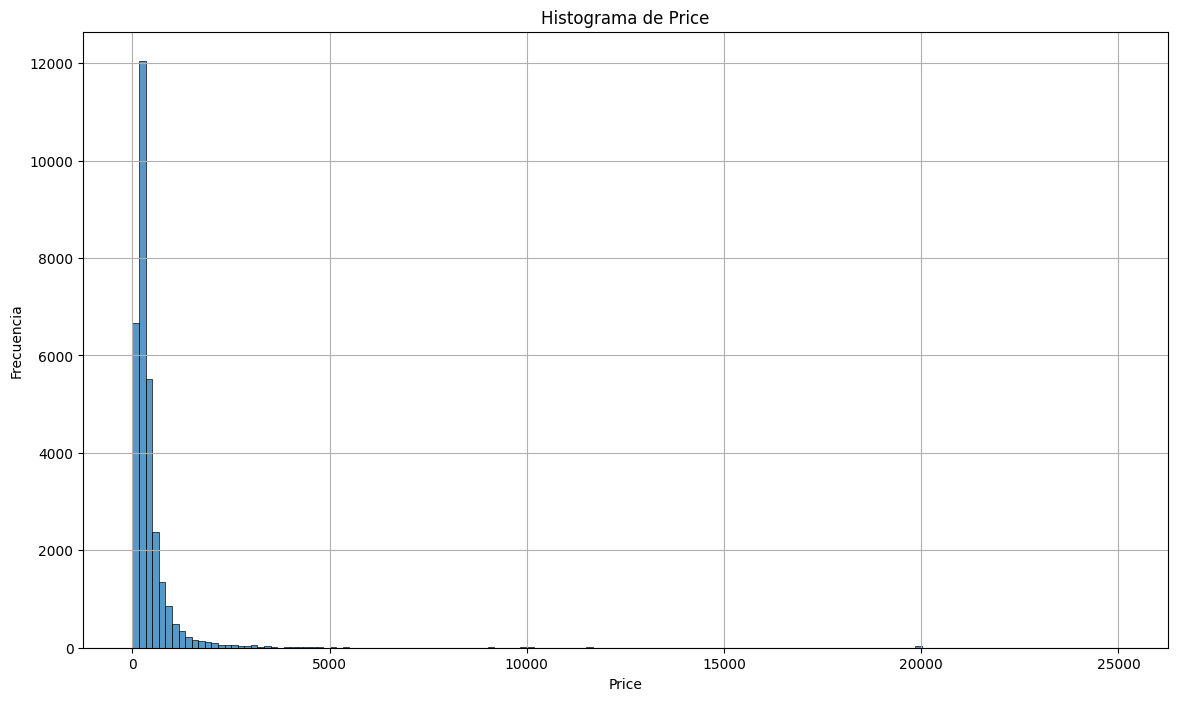

In [1311]:
plt.figure(figsize=(14, 8))
sns.histplot(df_final['price'], bins=150)
plt.title('Histograma de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<Axes: ylabel='price'>

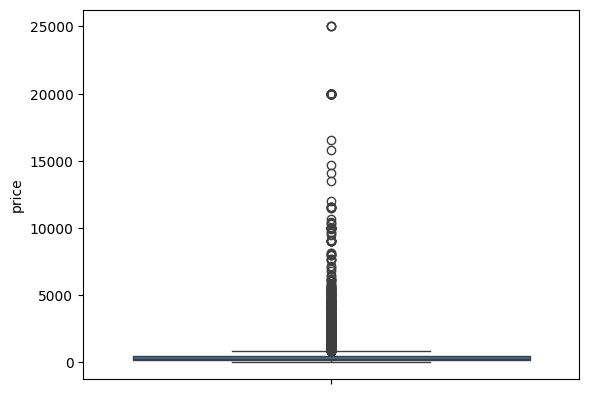

In [1312]:
sns.boxplot(y = df_final.price)

A partir del gráfico podemos ver que solo hay ouliers superiores. Vamos a determinar los precios mayores a 15000 como valores extremos a eliminar. En algunos casos pueden llegar a ser valores correctos como casa de lujos, pero son casos aislados que pueden llegar a perjudicar el rendimiento de los modelos.

In [1313]:
precio_outliers_extremos = 15000

filas_a_eliminar = df_final[(df_final['price'] > precio_outliers_extremos)]
df_final = df_final.drop(filas_a_eliminar.index)

print(f"Cantidad de filas eliminadas: {filas_a_eliminar.shape[0]}")

Cantidad de filas eliminadas: 50


<Axes: ylabel='price'>

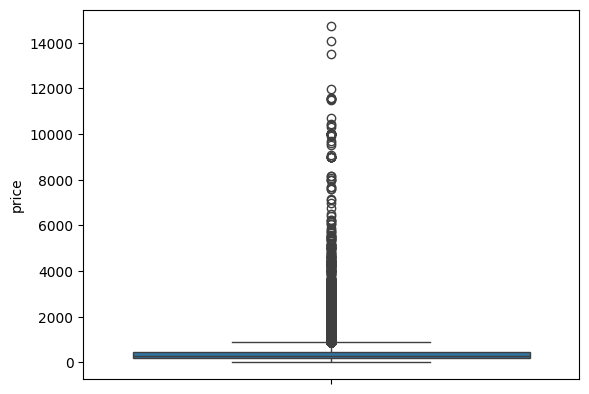

In [1314]:
sns.boxplot(y = df_final.price)

IQR

In [1315]:
limite_inferior, limite_superior, severo_inferior, severo_superior, outliers, outliers_severos = detectar_outliers_iqr(df_final, 'price')

print(f"Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
print(f"Cantidad de outliers detectados: {outliers.shape[0]}")
print(f"Cantidad de outliers severos detectados: {outliers_severos.shape[0]}")

Límite inferior: -235.50, Límite superior: 872.50
Cantidad de outliers detectados: 2673
Cantidad de outliers severos detectados: 1327


Z Score

In [1316]:
df_final['zm_price'] = z_mod_calculation(df_final['price'])

cantidad_outliers = (df_final['zm_price'] > 3.5).sum()
print(f"Cantidad de ouliers price: {cantidad_outliers}")

Cantidad de ouliers price: 2519


Podemos ver que los dos métodos arrojan una cantidad de outliers similar y son un poco menos del 10% del total. Antes de tomar una descisión vamos ver como se comportan los outliers en relación a las variables que más correlación tienen con el precio.

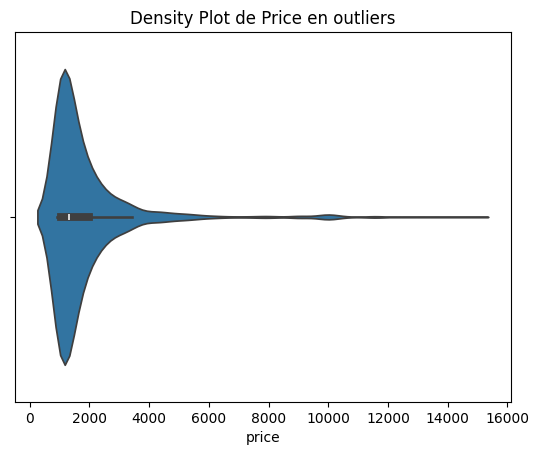

In [1317]:
outliers = df_final[df_final['zm_price'] > 3.5]

sns.violinplot(data=outliers, x='price')
plt.title('Density Plot de Price en outliers')
plt.show()

Podemos ver que la mayoría de los outliers se encuentran con un precio entre 1000 y 3000 lo cual podría significar que esos valores son razonables para propiedades de lujo o que alberguen una gran cantidad de personas.

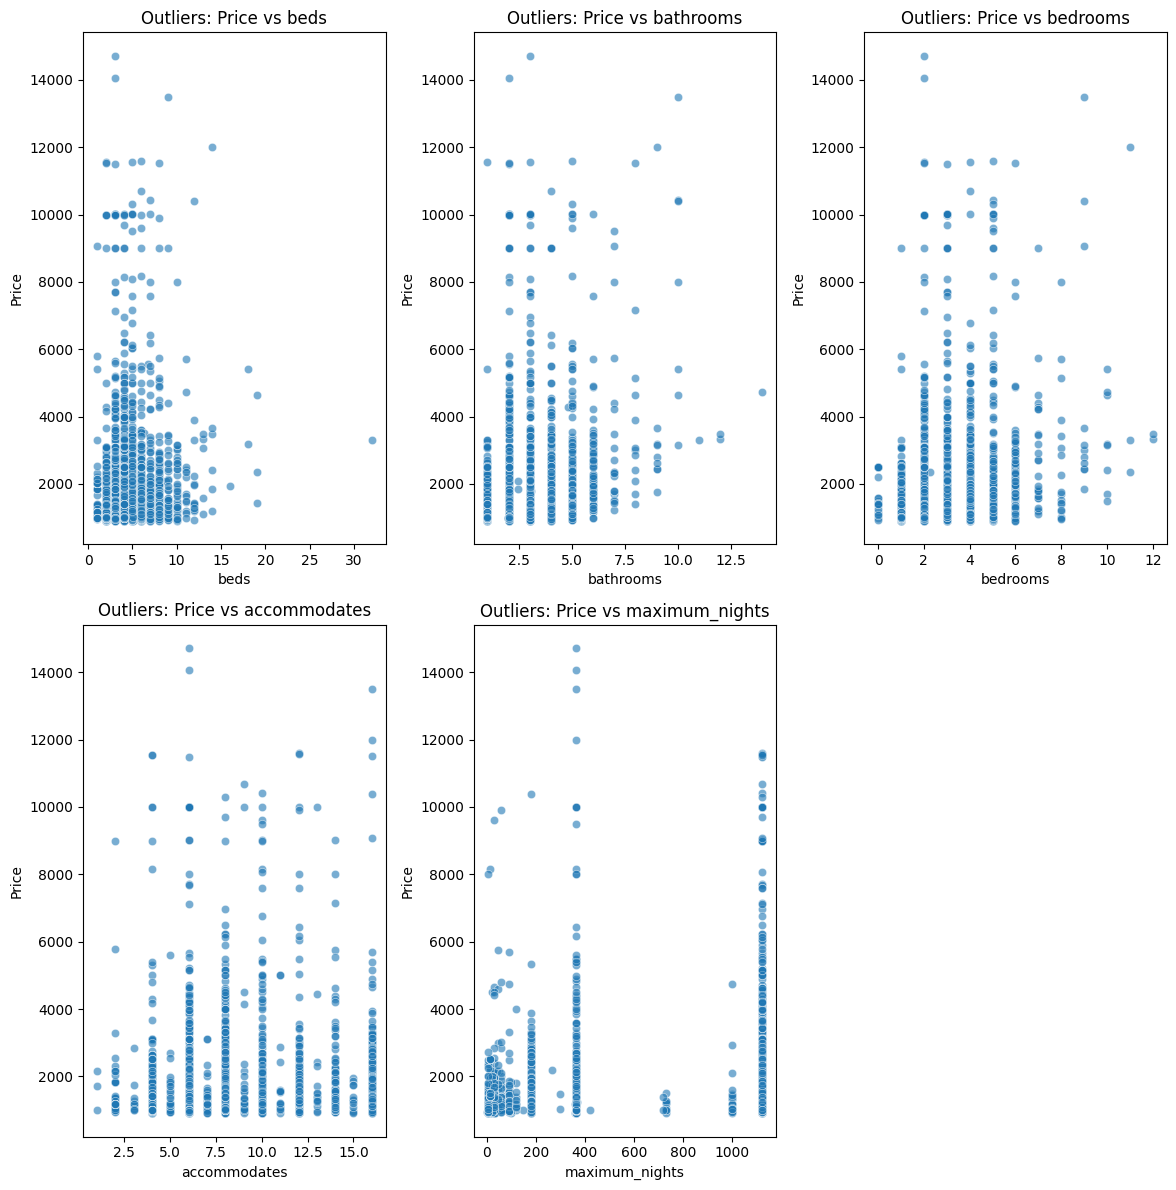

In [1318]:
outliers = df_final[df_final['zm_price'] > 3.5]

variables = ['beds', 'bathrooms', 'bedrooms', 'accommodates', 'maximum_nights']  # Variables a comparar

plt.figure(figsize=(12, 12))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=outliers, x=var, y='price', alpha=0.6)
    plt.title(f'Outliers: Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

A partir de esto podemos decir que hay muchos precios sin sentido para la cantidad de accomodates que poseen y al mismo tiempo con la cantidad de camas y dormitorios, que están altamente relacionadas. Por lo tanto se va a tomar una lógica para intentar eliminar esos outliers.

Se va a tomar la media de price del dataset para determinar el máximo valor por persona de un alojamiento y de esa manera eliminar los outliers que lo incumplan.

In [1319]:
max_precio_x_persona = df_final['price'].mean()

filas_a_eliminar = outliers[outliers['price'] > max_precio_x_persona * outliers['accommodates']]

df_final = df_final.drop(index=filas_a_eliminar.index)
df_final.reset_index(drop=True,inplace=True)
print(f"Filas eliminadas: {filas_a_eliminar.shape[0]}")

Filas eliminadas: 356


<Axes: ylabel='price'>

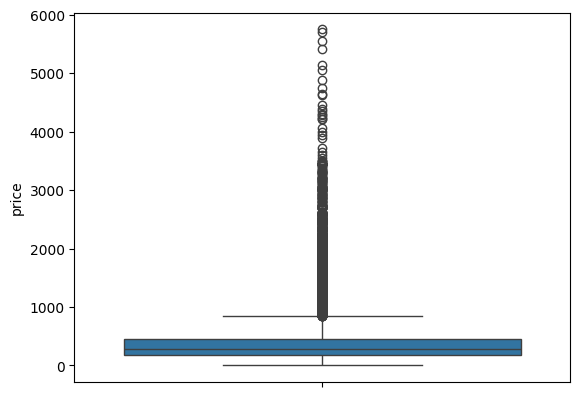

In [1320]:
sns.boxplot(y = df_final.price)

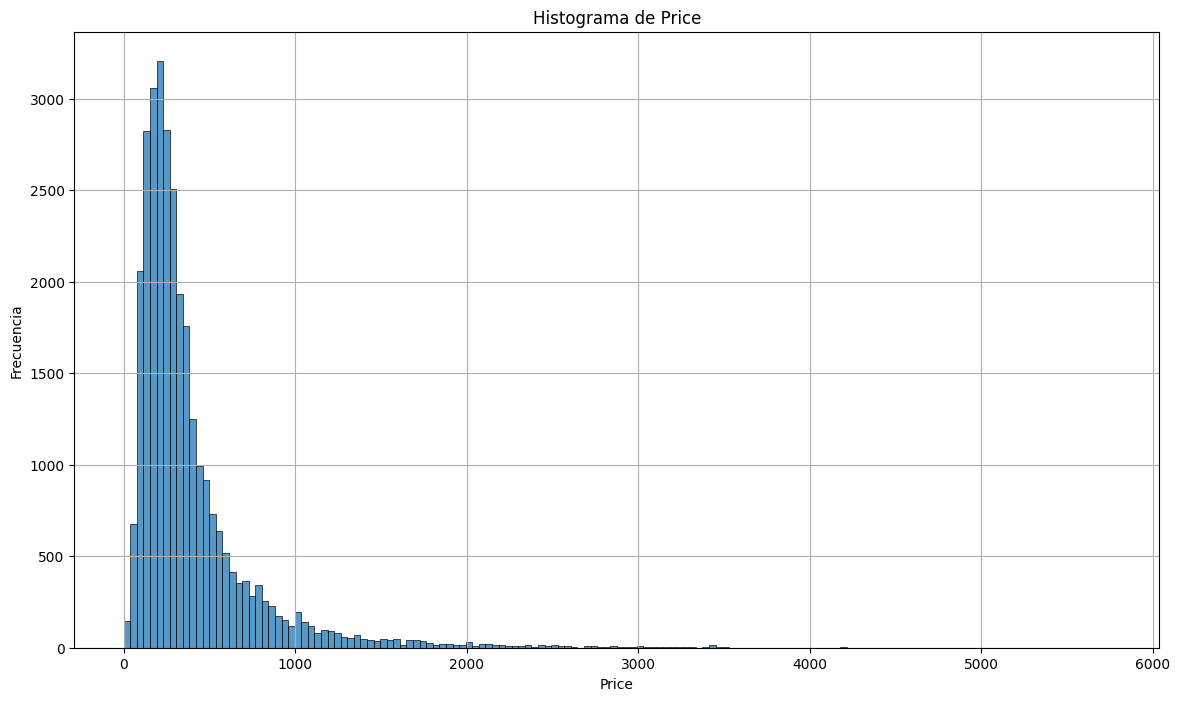

In [1321]:
plt.figure(figsize=(14, 8))
sns.histplot(df_final['price'], bins=150)
plt.title('Histograma de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<Axes: ylabel='beds'>

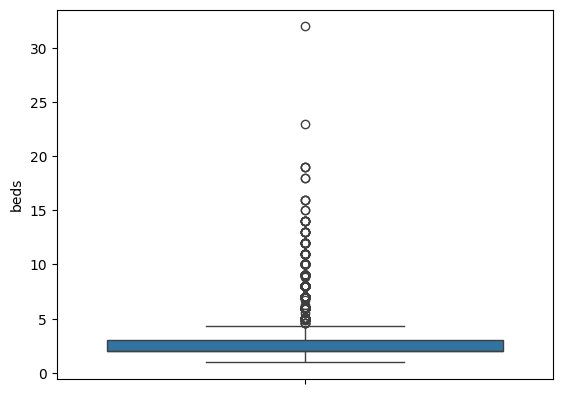

In [1322]:
sns.boxplot(y = df_final.beds)

In [1323]:
limite_inferior, limite_superior, severo_inferior, severo_superior, outliers, outliers_severos = detectar_outliers_iqr(df_final, 'beds')

print(f"Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
print(f"Cantidad de outliers detectados: {outliers.shape[0]}")
print(f"Cantidad de outliers severos detectados: {outliers_severos.shape[0]}")

Límite inferior: 0.50, Límite superior: 4.50
Cantidad de outliers detectados: 2410
Cantidad de outliers severos detectados: 629


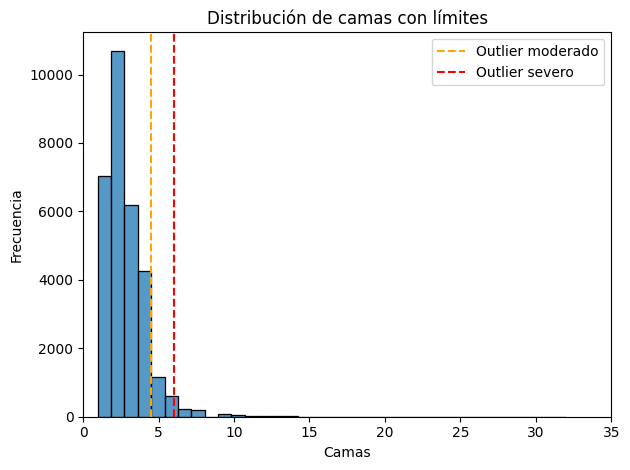

In [1324]:
sns.histplot(df_final['beds'], bins=35)
plt.axvline(limite_superior , color='orange', linestyle='--', label='Outlier moderado')
plt.axvline(severo_superior , color='red', linestyle='--', label='Outlier severo')
plt.xlim(0, 35)
plt.title("Distribución de camas con límites")
plt.xlabel("Camas")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

In [1325]:
df_final['zm_beds'] = z_mod_calculation(df_final['beds'])

cantidad_outliers = (df_final['zm_beds'] > 3.5).sum()
print(f"Cantidad de ouliers beds: {cantidad_outliers}")

Cantidad de ouliers beds: 400


<Axes: ylabel='bedrooms'>

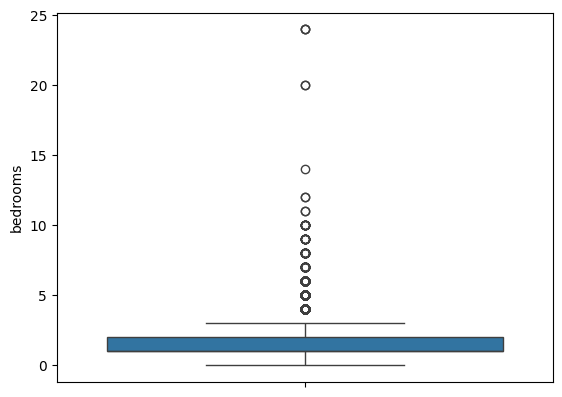

In [1326]:
sns.boxplot(y = df_final.bedrooms)

In [1327]:
limite_inferior, limite_superior, severo_inferior, severo_superior, outliers, outliers_severos = detectar_outliers_iqr(df_final, 'bedrooms')

print(f"Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
print(f"Cantidad de outliers detectados: {outliers.shape[0]}")
print(f"Cantidad de outliers severos detectados: {outliers_severos.shape[0]}")

Límite inferior: -0.50, Límite superior: 3.50
Cantidad de outliers detectados: 1450
Cantidad de outliers severos detectados: 193


In [1328]:
df_final['zm_bedrooms'] = z_mod_calculation(df_final['bedrooms'])

cantidad_outliers = (df_final['zm_bedrooms'] > 3.5).sum()
print(f"Cantidad de ouliers bedrooms: {cantidad_outliers}")

Cantidad de ouliers bedrooms: 82


<Axes: ylabel='bathrooms'>

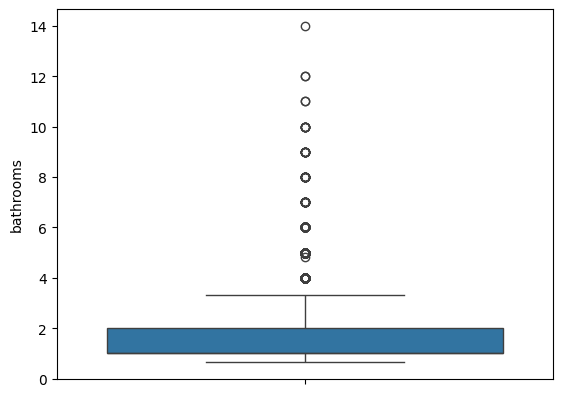

In [1329]:
sns.boxplot(y = df_final.bathrooms)

In [1330]:
limite_inferior, limite_superior, severo_inferior, severo_superior, outliers, outliers_severos = detectar_outliers_iqr(df_final, 'bathrooms')

print(f"Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
print(f"Cantidad de outliers detectados: {outliers.shape[0]}")
print(f"Cantidad de outliers severos detectados: {outliers_severos.shape[0]}")

Límite inferior: -0.50, Límite superior: 3.50
Cantidad de outliers detectados: 852
Cantidad de outliers severos detectados: 152


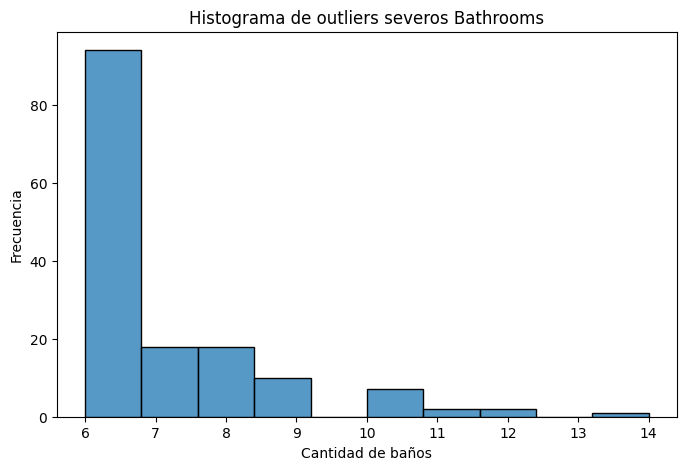

In [1331]:
plt.figure(figsize=(8, 5))
sns.histplot(outliers_severos['bathrooms'], bins=10)

plt.title('Histograma de outliers severos Bathrooms')
plt.xlabel('Cantidad de baños')
plt.ylabel('Frecuencia')


plt.show()

In [1332]:
os_grandes = outliers_severos[outliers_severos['bathrooms'] > 8]
os_grandes

,id,scrape_id,host_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,instant_bookable,has_neighborhood_overview,has_neighbourhood_highlights,has_license,has_description,has_review,zm_price,zm_beds,zm_bedrooms
3520,1.921255e+07,2.025031e+13,121881496.0,16.0,10.0,10.0,18.000000,5406.0,5.0,365.0,3.0,5.000000,True,Kihei-Makena,Maui,Entire villa,Entire home/apt,10 baths,"[""Coffee maker"", ""Heating"", ""Freezer"", ""Hair d...",t,True,True,True,True,True,28.812392,10.792000,6.0705
3934,2.074657e+07,2.025031e+13,12902911.0,16.0,10.0,10.0,19.000000,4650.0,2.0,30.0,1.0,5.000000,True,North Kohala,Hawaii,Room in boutique hotel,Private room,10 shared baths,"[""Hangers"", ""Essentials"", ""Crib"", ""Fire exting...",f,False,False,True,True,True,24.563042,11.466500,6.0705
7402,3.651418e+07,2.025031e+13,165007663.0,16.0,9.0,10.0,18.000000,3200.0,5.0,1125.0,1.0,5.000000,True,Koloa-Poipu,Kauai,Entire condo,Entire home/apt,9.5 baths,"[""Coffee maker"", ""Heating"", ""Hair dryer"", ""Bat...",f,False,False,True,True,True,16.412833,10.792000,6.0705
10325,4.793910e+07,2.025031e+13,39073224.0,16.0,12.0,12.0,13.000000,3330.0,2.0,180.0,0.0,4.733333,True,Lahaina,Maui,Entire condo,Entire home/apt,12 baths,"[""High chair - available upon request"", ""Condi...",t,True,True,True,True,False,17.143542,7.419500,7.4195
10513,4.819633e+07,2.025031e+13,15237359.0,16.0,11.0,11.0,32.000000,3295.0,5.0,1125.0,13.0,4.620000,True,Lahaina,Maui,Entire home,Entire home/apt,11 baths,"[""Movie theater"", ""Coffee maker: drip coffee m...",f,False,False,True,True,True,16.946813,20.235000,6.7450
11181,4.934529e+07,2.025031e+13,39073224.0,16.0,9.0,9.0,10.000000,2802.0,2.0,180.0,0.0,4.976667,True,Lahaina,Maui,Entire condo,Entire home/apt,9 baths,"[""High chair - available upon request"", ""Condi...",t,True,True,True,True,False,14.175742,5.396000,5.3960
13413,5.376068e+07,2.025031e+13,121881496.0,16.0,14.0,10.0,11.000000,4742.0,1.0,1000.0,2.0,4.500000,True,Kihei-Makena,Maui,Entire home,Entire home/apt,14 baths,"[""Coffee maker"", ""Hair dryer"", ""Dishwasher"", ""...",t,True,True,True,True,True,25.080158,6.070500,6.0705
14576,5.906502e+17,2.025031e+13,39073224.0,16.0,9.0,9.0,10.000000,2458.0,2.0,180.0,0.0,4.866667,True,Lahaina,Maui,Entire condo,Entire home/apt,9 baths,"[""Clothing storage"", ""Ceiling fan"", ""Cooking b...",t,True,True,True,True,False,12.242175,5.396000,5.3960
16299,6.956313e+17,2.025031e+13,39073224.0,16.0,9.0,9.0,14.000000,3655.0,2.0,180.0,0.0,4.683333,True,Lahaina,Maui,Entire condo,Entire home/apt,9 baths,"[""Clothing storage"", ""Ceiling fan"", ""Cooking b...",t,True,True,True,True,False,18.970312,8.094000,5.3960
16927,7.160786e+17,2.025031e+13,39073224.0,16.0,9.0,9.0,10.000000,2432.0,2.0,180.0,0.0,4.570000,True,Lahaina,Maui,Entire condo,Entire home/apt,9 baths,"[""Clothing storage"", ""Ceiling fan"", ""Cooking b...",t,True,True,True,True,False,12.096033,5.396000,5.3960


Aunque sean valores extraños, no parece datos mal cargados. Son lugares para hospedar gran cantidad de perosnas o hostels con baños compartidos.

<Axes: ylabel='accommodates'>

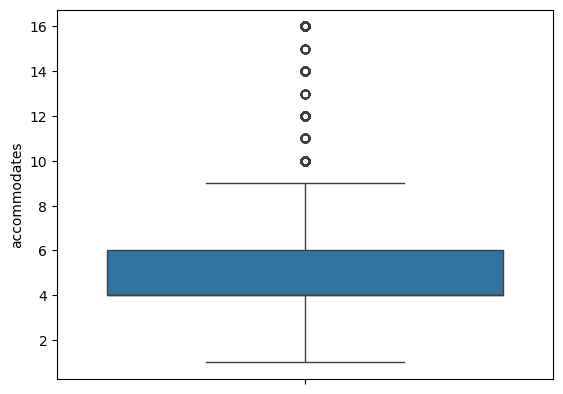

In [1333]:
sns.boxplot(y = df_final.accommodates)

No se observan outliers notorios sin sentido. Se establece que en el dataset el máximo de ocupantes para un alojamiento es de 16 personas.

In [1334]:
limite_inferior, limite_superior, severo_inferior, severo_superior, outliers, outliers_severos = detectar_outliers_iqr(df_final, 'accommodates')

print(f"Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
print(f"Cantidad de outliers detectados: {outliers.shape[0]}")
print(f"Cantidad de outliers severos detectados: {outliers_severos.shape[0]}")

Límite inferior: 1.00, Límite superior: 9.00
Cantidad de outliers detectados: 1315
Cantidad de outliers severos detectados: 365


Dado que el maximo de ocupantes registrados es 16, se determina que los registros de beds y bedrooms mayores a 16 son datos sin sentido y por lo tanto se eliminan.

In [1335]:
ocupantes_maximos = 16
precio_outliers_extremos = 12000

filas_a_eliminar = df_final[(df_final['price'] > precio_outliers_extremos) | (df_final['beds'] > ocupantes_maximos) | (df_final['bedrooms'] > ocupantes_maximos)]
df_final = df_final.drop(filas_a_eliminar.index)

print(f"Cantidad de filas eliminadas: {filas_a_eliminar.shape[0]}")

Cantidad de filas eliminadas: 12


Se deberíana analizar las 4 en conjunto.

<Axes: ylabel='review_scores_rating'>

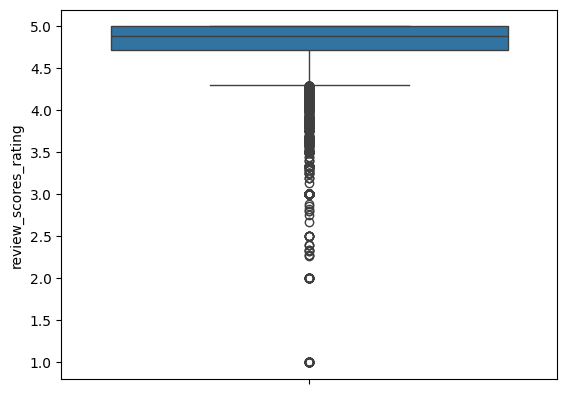

In [1336]:
sns.boxplot(y = df_final.review_scores_rating)

No parece anormal en este gráfico.

<Axes: ylabel='minimum_nights'>

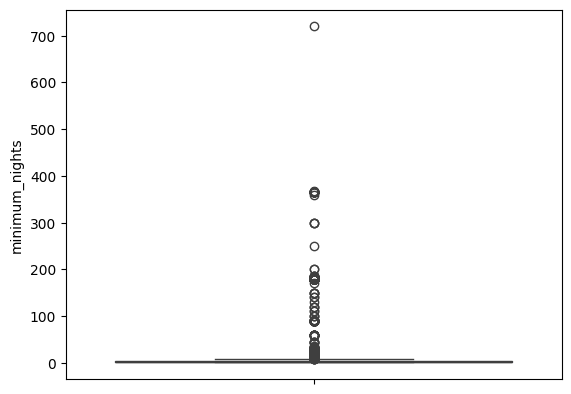

In [1337]:
sns.boxplot(y = df_final.minimum_nights)

In [1338]:
limite_inferior, limite_superior, severo_inferior, severo_superior, outliers, outliers_severos = detectar_outliers_iqr(df_final, 'minimum_nights')

print(f"Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
print(f"Cantidad de outliers detectados: {outliers.shape[0]}")
print(f"Cantidad de outliers severos detectados: {outliers_severos.shape[0]}")

Límite inferior: -3.50, Límite superior: 8.50
Cantidad de outliers detectados: 3369
Cantidad de outliers severos detectados: 3199


'minimum_nights contiene una gran cantidad de outliers y casi en su totalidad son severo. Por lo tanto se considera que es una variable que puede perjudicar el rendimiento del modélo de esa forma. Se decide escalarla para no perder toda la información.

In [1339]:
scaler = skp.StandardScaler()

df_final['minimum_nights_scaled'] = scaler.fit_transform(df_final[['minimum_nights']])

In [1340]:
df_final = df_final.drop(columns=['minimum_nights'])
df_final.reset_index(drop=True,inplace=True)

<Axes: ylabel='maximum_nights'>

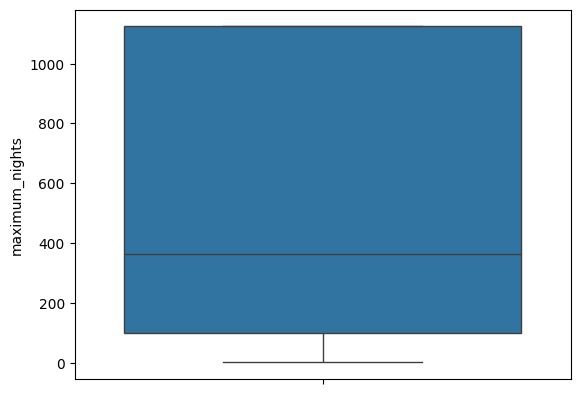

In [1341]:
sns.boxplot(y = df_final.maximum_nights)

No tiene outliers

In [1342]:
df_final.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30540 entries, 0 to 30539
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     30540 non-null  float64
 1   scrape_id              30540 non-null  float64
 2   host_id                30540 non-null  float64
 3   accommodates           30540 non-null  float64
 4   bathrooms              30540 non-null  float64
 5   bedrooms               30540 non-null  float64
 6   beds                   30540 non-null  float64
 7   price                  30540 non-null  float64
 8   maximum_nights         30540 non-null  float64
 9   number_of_reviews      30540 non-null  float64
 10  review_scores_rating   30540 non-null  float64
 11  zm_price               30540 non-null  float64
 12  zm_beds                30540 non-null  float64
 13  zm_bedrooms            30540 non-null  float64
 14  minimum_nights_scaled  30540 non-null  float64
dtypes:

In [1343]:
df_final.drop(columns=['zm_price', 'zm_beds', 'zm_bedrooms'], inplace=True)
df_final.reset_index(drop=True,inplace=True)

###Análisi Multivariado

## Isolation tree por sub-grupos arbitrarios

In [1344]:
from sklearn.ensemble import IsolationForest

In [1345]:
features = ['beds', 'accommodates', 'bedrooms']
X = df_final[features].copy()

iso_forest = IsolationForest(n_estimators=100, max_samples="auto", contamination=0.05, max_features = len(features), bootstrap = False, random_state=1,)
pred = iso_forest.fit_predict(X)

# Almaceno scores y etiquetas
X["scores"] = iso_forest.decision_function(X)
X["outlier_label"] = pred

# Observaciones anómalas
X[X.outlier_label == -1]
X.outlier_label.value_counts()

,count
outlier_label,
1,29016
-1,1524


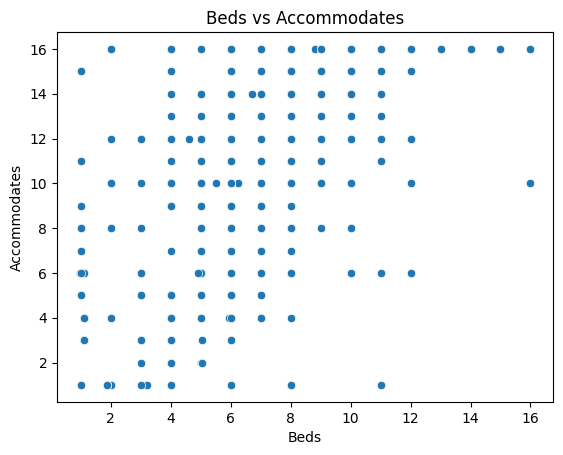

In [1346]:
outliers_isoforest = X[X.outlier_label == -1]


sns.scatterplot(data=outliers_isoforest, x='beds', y='accommodates')
plt.title('Beds vs Accommodates')
plt.xlabel('Beds')
plt.ylabel('Accommodates')
plt.show()

Con esté gráfico podemos ver que la data nos es muy dispersa pero hay varios outliers extremos (1 cama para máximo 16 ocupantes / 11 camas para máximo 1 ocupante) o casos sin mucho sentido. Por eso se decide eliminar los datos que no cumplan la siguiente lógica: No tiene mucho sentido que haya más camas que ocupantes máximos y que la cantidad de ocupantes máximos no sea mayor a la cantidad de camas * 3

In [1347]:
outliers_filtrados = outliers_isoforest[
    (outliers_isoforest['beds'] <= outliers_isoforest['accommodates']) &
    (outliers_isoforest['accommodates'] <= outliers_isoforest['beds'] * 3)
]

print(f"Outliers eliminados: {outliers_isoforest.shape[0] - outliers_filtrados.shape[0]}")

Outliers eliminados: 153


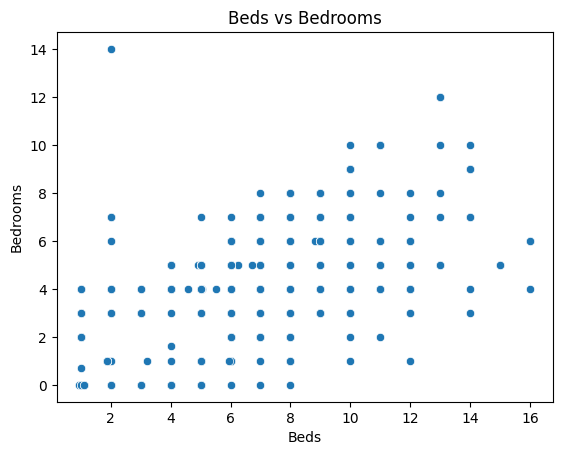

In [1348]:
sns.scatterplot(data=outliers_isoforest, x='beds', y='bedrooms')
plt.title('Beds vs Bedrooms')
plt.xlabel('Beds')
plt.ylabel('Bedrooms')
plt.show()

Podemos obbservar que hay varios registros donde hay mas habitaciones que camas, lo cual no tiene mucho sentido. Por lo tanto se decide eliminarlos.

In [1349]:
outliers_eliminar = outliers_filtrados[outliers_filtrados['bedrooms'] > outliers_filtrados['beds']]
df_final = df_final.drop(index=outliers_eliminar.index)
df_final.reset_index(drop=True,inplace=True)
print(f"Filas eliminadas: {outliers_eliminar.shape[0]}")

Filas eliminadas: 12


In [1350]:
features = ['price', 'accommodates', 'bathrooms', 'bedrooms']
X = df_final[features].copy()

iso_forest = IsolationForest(n_estimators=100, max_samples="auto", contamination=0.05, max_features = len(features), bootstrap = False, random_state=1,)
pred = iso_forest.fit_predict(X)

# Almaceno scores y etiquetas
X["scores"] = iso_forest.decision_function(X)
X["outlier_label"] = pred

# Observaciones anómalas
X[X.outlier_label == -1]
X.outlier_label.value_counts()

,count
outlier_label,
1,29001
-1,1527


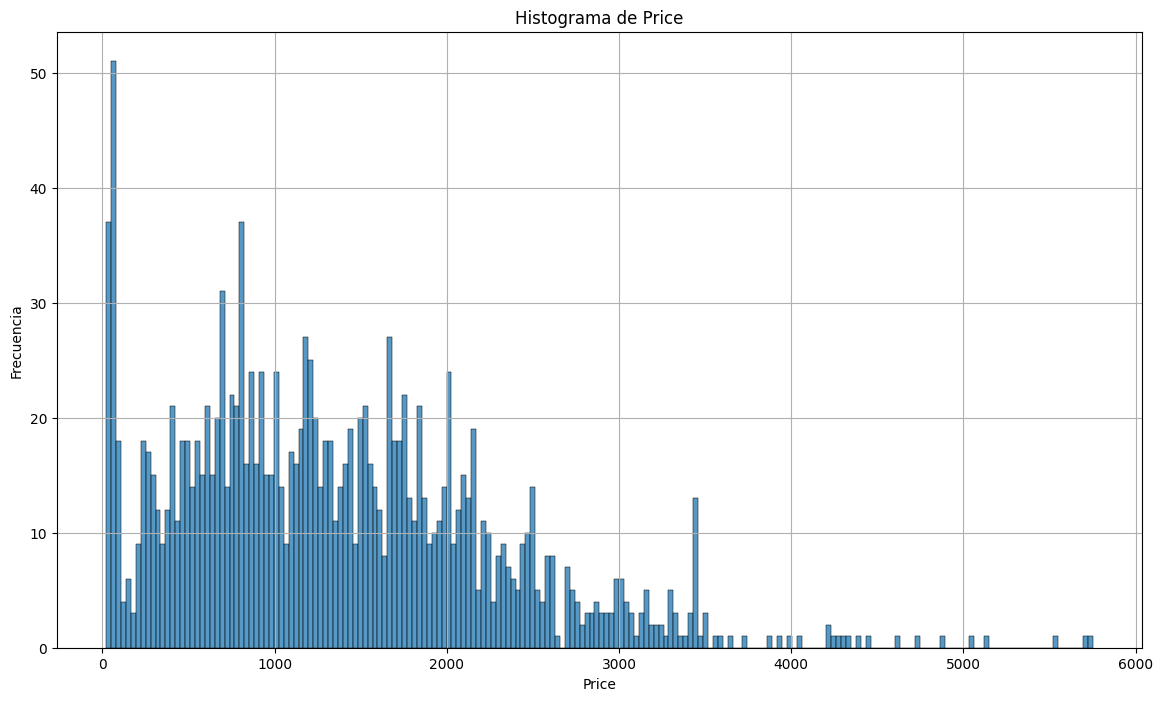

In [1351]:
outliers_isoforest = X[X.outlier_label == -1]

plt.figure(figsize=(14, 8))
sns.histplot(outliers_isoforest['price'], bins= 200)
plt.title('Histograma de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Se ve una gran cantidad de outliers para precios bajos

In [1352]:
outliers_precios_bajos = outliers_isoforest
outliers_precios_bajos.shape[0]

1527

Vamos a var los precios más bajos del dataset para ver si hay datos con poco sentido

In [1353]:
outliers_precios_bajos_sorted = outliers_precios_bajos.sort_values(by='price', ascending=True)
outliers_precios_bajos_sorted.head(10)

,price,accommodates,bathrooms,bedrooms,scores,outlier_label
8996,22.0,10.0,3.0,3.0,-0.002408,-1
24198,25.0,12.0,3.0,3.0,-0.035785,-1
18916,30.0,1.0,4.0,1.0,-0.097338,-1
10137,30.0,1.0,4.0,1.0,-0.097338,-1
18917,30.0,1.0,4.0,1.0,-0.097338,-1
10098,35.0,1.0,4.0,1.0,-0.097338,-1
9745,35.0,1.0,4.0,1.0,-0.097338,-1
22628,35.0,1.0,4.0,1.0,-0.097338,-1
22966,35.0,1.0,4.0,1.0,-0.097338,-1
10099,35.0,1.0,4.0,1.0,-0.097338,-1


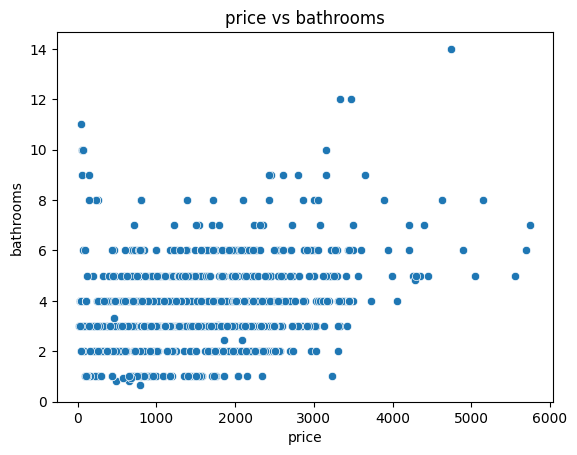

In [1354]:
sns.scatterplot(data=outliers_precios_bajos, x='price', y='bathrooms')
plt.title('price vs bathrooms')
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.show()

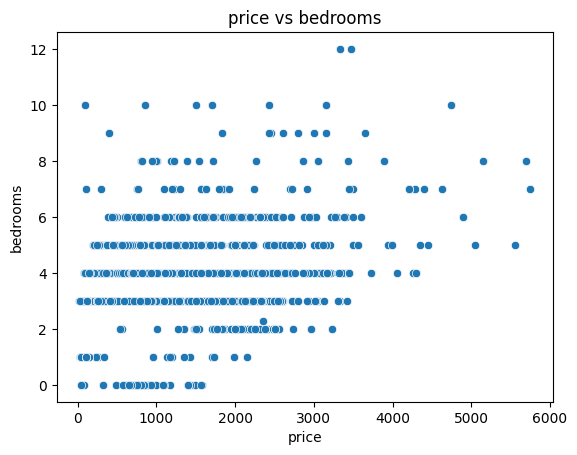

In [1355]:
sns.scatterplot(data=outliers_precios_bajos, x='price', y='bedrooms')
plt.title('price vs bedrooms')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()

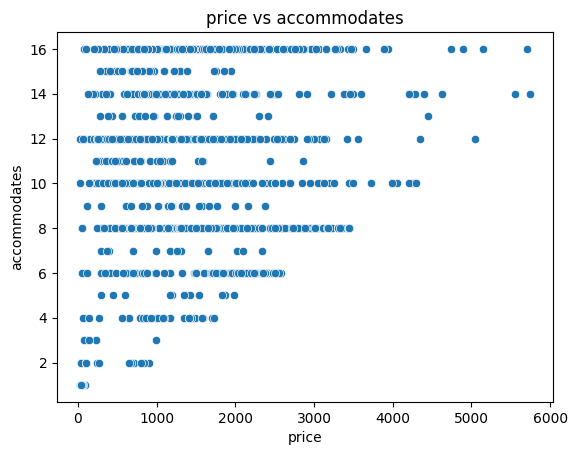

In [1356]:
sns.scatterplot(data=outliers_precios_bajos, x='price', y='accommodates')
plt.title('price vs accommodates')
plt.xlabel('price')
plt.ylabel('accommodates')
plt.show()

#Transformación de Datos

In [1357]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30528 entries, 0 to 30527
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            30528 non-null  float64
 1   scrape_id                     30528 non-null  float64
 2   host_id                       30528 non-null  float64
 3   accommodates                  30528 non-null  float64
 4   bathrooms                     30528 non-null  float64
 5   bedrooms                      30528 non-null  float64
 6   beds                          30528 non-null  float64
 7   price                         30528 non-null  float64
 8   maximum_nights                30528 non-null  float64
 9   number_of_reviews             30528 non-null  float64
 10  review_scores_rating          30528 non-null  float64
 11  host_is_superhost             30528 non-null  bool   
 12  neighbourhood_cleansed        30528 non-null  object 
 13  n

Primero transformamos las variables booleanas en numéricas

In [1358]:
bool_cols = ['host_is_superhost', 'has_neighborhood_overview', 'has_neighbourhood_highlights',
             'has_license', 'has_description', 'has_review']
df_final[bool_cols] = df_final[bool_cols].astype(int)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30528 entries, 0 to 30527
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            30528 non-null  float64
 1   scrape_id                     30528 non-null  float64
 2   host_id                       30528 non-null  float64
 3   accommodates                  30528 non-null  float64
 4   bathrooms                     30528 non-null  float64
 5   bedrooms                      30528 non-null  float64
 6   beds                          30528 non-null  float64
 7   price                         30528 non-null  float64
 8   maximum_nights                30528 non-null  float64
 9   number_of_reviews             30528 non-null  float64
 10  review_scores_rating          30528 non-null  float64
 11  host_is_superhost             30528 non-null  int64  
 12  neighbourhood_cleansed        30528 non-null  object 
 13  n

Analizamos las variables object, probablemente strings.

In [1359]:
columnas_transformar = df_final[['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'instant_bookable']]

columnas_transformar.head(10)

,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,instant_bookable
0,South Kohala,Hawaii,Entire rental unit,Entire home/apt,1 bath,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",f
1,South Kona,Hawaii,Entire rental unit,Entire home/apt,1 bath,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",t
2,Puna,Hawaii,Private room in cabin,Private room,1 shared bath,"[""Kitchen"", ""Host greets you"", ""Breakfast"", ""F...",f
3,Puna,Hawaii,Entire home,Entire home/apt,0 baths,"[""Free washer \u2013 In building"", ""Free carpo...",f
4,Kihei-Makena,Maui,Entire condo,Entire home/apt,2 baths,"[""Clothing storage"", ""Garden view"", ""Cooking b...",f
5,North Shore Kauai,Kauai,Entire condo,Entire home/apt,1 bath,"[""Coffee maker"", ""Conditioner"", ""Free parking ...",t
6,Koolaupoko,Honolulu,Entire guesthouse,Entire home/apt,1 bath,"[""Coffee maker"", ""Fast wifi \u2013 113 Mbps"", ...",f
7,Lahaina,Maui,Entire rental unit,Entire home/apt,1 bath,"[""Drying rack for clothing"", ""Cooking basics"",...",f
8,Primary Urban Center,Honolulu,Entire home,Entire home/apt,1 bath,"[""TV with standard cable"", ""Washer"", ""Free par...",f
9,South Kona,Hawaii,Private room in guesthouse,Private room,1 shared bath,"[""Dryer"", ""Essentials"", ""Indoor fireplace"", ""C...",f


intant_bookable contiene verdadero o falso. Se le transforma en la columna is_instant_bookable y se le otorga valores 0 o 1.

In [1360]:
df_final['is_instant_bookable'] = df_final['instant_bookable'].map({'f': 0, 't': 1})
df_final.drop('instant_bookable', axis=1, inplace=True)

bathroom_text va posee la informacíon de si el baño es compartido o no. Entonces se va a transformar en la variable is_bathroom_shared

In [1361]:
df_final['is_bathroom_shared'] = df_final['bathrooms_text'].str.lower().str.contains('shared').astype(int)
df_final.drop('bathrooms_text', axis=1, inplace=True)

Análisis de variables categóricas

In [1362]:
categorical_columns = ['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type']

for col in categorical_columns:
    print(f"\nColumna: {col}")
    print(f"Cantidad de categorías: {df_final[col].nunique()}")
    print(df_final[col].value_counts())


Columna: neighbourhood_cleansed
Cantidad de categorías: 30
neighbourhood_cleansed
Primary Urban Center     6221
Lahaina                  4359
Kihei-Makena             4155
North Kona               3372
North Shore Kauai        2236
South Kohala             1768
Koloa-Poipu              1504
Puna                     1116
Kapaa-Wailua              816
Ewa                       767
Lihue                     676
South Hilo                514
Koolauloa                 475
North Shore Oahu          321
Waianae                   284
Koolaupoko                282
South Kona                264
Wailuku-Kahului           232
Paia-Haiku                200
Kau                       191
Molokai                   182
East Honolulu             161
North Kohala              102
Hana                       73
Makawao-Pukalani-Kula      72
Hamakua                    66
North Hilo                 47
Central Oahu               43
Waimea-Kekaha              20
Lanai                       9
Name: count, dtyp

neighbourhood_cleansed tiene muchas categorias por lo que se buscara una forma de agruparlas. Para eso primero vamos a ver que relación hay entre cada localidad y su precio.

In [1363]:
precio_nc = df_final.groupby(['neighbourhood_cleansed', 'neighbourhood_group_cleansed']).agg(
    cantidad = ('price', 'count'),
    precio_promedio = ('price', 'mean'),
    precio_maximo = ('price', 'max'),
    precio_minimo = ('price', 'min')
).sort_values('precio_promedio', ascending=False)

precio_nc

,,cantidad,precio_promedio,precio_maximo,precio_minimo
neighbourhood_cleansed,neighbourhood_group_cleansed,,,,
Koloa-Poipu,Kauai,1504,607.861702,4286.0,22.0
Ewa,Honolulu,767,579.305085,2731.0,22.0
Lahaina,Maui,4359,575.528562,3888.0,14.0
South Kohala,Hawaii,1768,566.032805,5549.0,75.0
North Shore Oahu,Honolulu,321,454.763240,3381.0,40.0
Waimea-Kekaha,Kauai,20,440.100000,1067.0,149.0
Koolauloa,Honolulu,475,431.265263,2619.0,65.0
Wailuku-Kahului,Maui,232,402.900862,3148.0,28.0
Kihei-Makena,Maui,4155,398.574007,4742.0,85.0


Veo que no hay relación de agrupamiento entre neighbourhood_cleansed y	neighbourhood_group_cleansed con relación a la variable precio.

Vemos que en la antepenultima fila hay una valor mínimo de price igual a 1, lo que pareceria ser un dato mal cargado. Por lo que vamos a ver rapidamente los valores más bajos de la variable price.

In [1364]:
precios_bajos_sorted = df_final.sort_values(by='price', ascending=True)
precios_bajos_sorted.head(3)

,id,scrape_id,host_id,accommodates,bathrooms,bedrooms,beds,price,maximum_nights,number_of_reviews,review_scores_rating,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,has_neighborhood_overview,has_neighbourhood_highlights,has_license,has_description,has_review,minimum_nights_scaled,is_instant_bookable,is_bathroom_shared
13361,5.368666e+07,2.025031e+13,7158182.0,2.0,1.0,1.0,1.0,1.0,30.0,6.0,4.67,0,Puna,Hawaii,Private room in home,Private room,"[""Garden view"", ""Cooking basics"", ""Dedicated w...",0,0,0,1,1,-0.263819,0,1
27197,1.208358e+18,2.025031e+13,13394407.0,2.0,1.0,1.0,1.0,12.0,30.0,2.0,5.00,1,Puna,Hawaii,Tent,Entire home/apt,"[""Lockbox"", ""Free parking on premises"", ""Wifi""...",0,0,0,1,1,-0.118315,0,0
28235,1.258862e+18,2.025031e+13,343816045.0,8.0,3.0,2.0,4.0,14.0,7.0,1.0,5.00,0,Lahaina,Maui,Entire condo,Entire home/apt,"[""Coffee maker"", ""Conditioner"", ""Sound system""...",1,1,1,1,1,-0.118315,0,0


Eliminamos la fila con precio = 1

In [1365]:
df_final = df_final.drop(13361)
df_final.reset_index(drop=True,inplace=True)

In [1366]:
precio_nc = df_final.groupby(['neighbourhood_cleansed']).agg(
    cantidad = ('price', 'count'),
    precio_promedio = ('price', 'mean'),
    precio_maximo = ('price', 'max'),
    precio_minimo = ('price', 'min'),
).sort_values('precio_promedio', ascending=False)

precio_nc

,cantidad,precio_promedio,precio_maximo,precio_minimo
neighbourhood_cleansed,,,,
Koloa-Poipu,1504,607.861702,4286.0,22.0
Ewa,767,579.305085,2731.0,22.0
Lahaina,4359,575.528562,3888.0,14.0
South Kohala,1768,566.032805,5549.0,75.0
North Shore Oahu,321,454.763240,3381.0,40.0
Waimea-Kekaha,20,440.100000,1067.0,149.0
Koolauloa,475,431.265263,2619.0,65.0
Wailuku-Kahului,232,402.900862,3148.0,28.0
Kihei-Makena,4155,398.574007,4742.0,85.0


se decide agrupar los barrios en relación a las variables cantidad	precio_promedio	precio_maximo	precio_minimo utilizando k-means.

Primero vamos a utilizar el del codo para determinar los clusters.

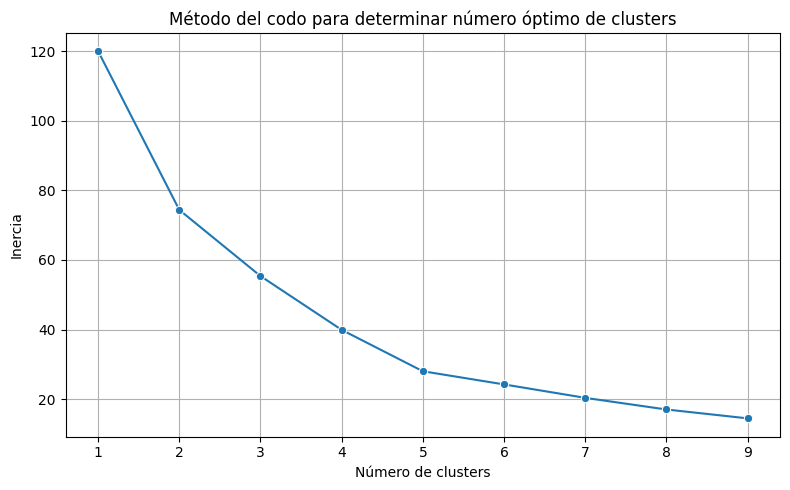

In [1367]:
from sklearn.cluster import KMeans

agrup_df_final = df_final.groupby("neighbourhood_cleansed").agg(
    cantidad=("price", "count"),
    precio_promedio=("price", "mean"),
    precio_maximo=("price", "max"),
    precio_minimo=("price", "min"),
).reset_index()
features = ["cantidad", "precio_promedio", "precio_maximo", "precio_minimo"]
scaler = skp.StandardScaler()
X = scaler.fit_transform(agrup_df_final[features].fillna(0))

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 10), y=inertia, marker="o")
plt.title("Método del codo para determinar número óptimo de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()

se decide utilizar 4 clusters

In [1368]:
features = ["cantidad", "precio_promedio", "precio_maximo", "precio_minimo"]
X = agrup_df_final[features].fillna(0)
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
agrup_df_final["cluster"] = kmeans.fit_predict(X_scaled)

cluster_summary = agrup_df_final[["neighbourhood_cleansed", "cluster", *features]]
cluster_summary = cluster_summary.sort_values(by="cluster").reset_index(drop=True)

cluster_summary

,neighbourhood_cleansed,cluster,cantidad,precio_promedio,precio_maximo,precio_minimo
0,Hana,0,73,349.534247,968.0,108.0
1,Lanai,0,9,268.444444,504.0,155.0
2,Waimea-Kekaha,0,20,440.100000,1067.0,149.0
3,Kau,1,191,154.303665,1198.0,35.0
4,Molokai,1,182,149.895604,491.0,36.0
5,Hamakua,1,66,211.090909,1557.0,45.0
6,Puna,1,1115,163.794619,2139.0,12.0
7,Central Oahu,1,43,193.255814,575.0,59.0
8,South Hilo,1,514,197.217899,960.0,27.0
9,North Shore Kauai,2,2236,389.462880,4213.0,22.0


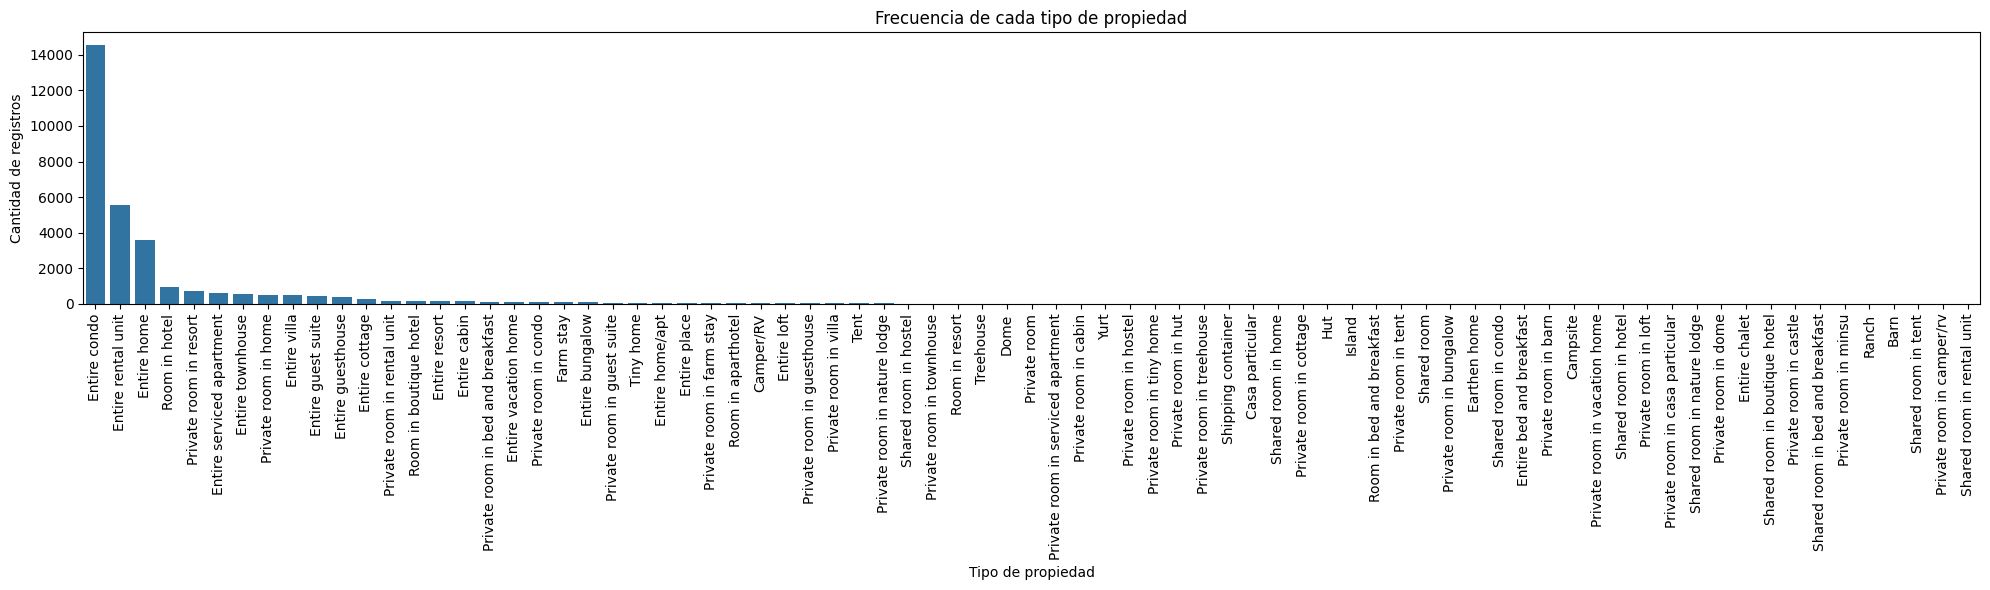

In [1369]:
property_counts = df_final['property_type'].value_counts()

plt.figure(figsize=(20, 6))
sns.barplot(x=property_counts.index, y=property_counts.values)
plt.xticks(rotation=90)
plt.title('Frecuencia de cada tipo de propiedad')
plt.ylabel('Cantidad de registros')
plt.xlabel('Tipo de propiedad')
plt.tight_layout()
plt.show()

In [1370]:
x=property_counts
x.head(20)

,count
property_type,
Entire condo,14533
Entire rental unit,5575
Entire home,3582
Room in hotel,945
Private room in resort,750
Entire serviced apartment,610
Entire townhouse,545
Private room in home,501
Entire villa,486


In [1371]:
roomtype_counts = df_final['room_type'].value_counts()
roomtype_counts

,count
room_type,
Entire home/apt,27423
Private room,2688
Hotel room,382
Shared room,34


Los tipos de property_type aunque tiene información extra pereciera tener una gran relación de agrupamiento con la variable room_type. Para evitar redundancia se decide eliminarla.

In [1372]:
df_final.drop('property_type', axis=1, inplace=True)

 Las variables room_type y neighbourhood_group_cleansed se van a transformar en 4 variables dummies para categorizarlas, a través de one-hot encoding.




In [1373]:
dummies = pd.get_dummies(df_final[['room_type', 'neighbourhood_group_cleansed']], drop_first=True)
dummies = dummies.astype(int)


df_final = pd.concat([df_final.drop(['room_type', 'neighbourhood_group_cleansed'], axis=1), dummies], axis=1)

df_final.head(7)

,id,scrape_id,host_id,accommodates,bathrooms,bedrooms,beds,price,maximum_nights,number_of_reviews,review_scores_rating,host_is_superhost,neighbourhood_cleansed,amenities,has_neighborhood_overview,has_neighbourhood_highlights,has_license,has_description,has_review,minimum_nights_scaled,is_instant_bookable,is_bathroom_shared,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Honolulu,neighbourhood_group_cleansed_Kauai,neighbourhood_group_cleansed_Maui
0,5269.0,2.025031e+13,7620.0,2.0,1.000000,1.0,1.0,128.0,1125.0,40.0,4.780000,1,South Kohala,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",1,1,1,1,1,-0.191067,0,0,0,0,0,0,0,0
1,5387.0,2.025031e+13,7878.0,2.0,1.000000,0.0,2.0,97.0,60.0,231.0,4.670000,0,South Kona,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",1,1,1,1,1,-0.118315,1,0,0,0,0,0,0,0
2,5480.0,2.025031e+13,8145.0,2.0,1.000000,1.0,1.0,117.0,60.0,0.0,4.726667,0,Puna,"[""Kitchen"", ""Host greets you"", ""Breakfast"", ""F...",1,1,0,1,0,-0.227443,0,1,0,1,0,0,0,0
3,7888.0,2.025031e+13,22083.0,4.0,1.127584,1.0,1.0,98.0,1125.0,128.0,4.650000,0,Puna,"[""Free washer \u2013 In building"", ""Free carpo...",0,0,1,1,1,-0.263819,0,0,0,0,0,0,0,0
4,7896.0,2.025031e+13,21844.0,4.0,2.000000,1.0,2.0,211.0,365.0,92.0,4.700000,0,Kihei-Makena,"[""Clothing storage"", ""Garden view"", ""Cooking b...",1,1,1,1,1,-0.154691,0,0,0,0,0,0,0,1
5,13238.0,2.025031e+13,51647.0,2.0,1.000000,0.0,1.0,148.0,1125.0,183.0,4.500000,1,North Shore Kauai,"[""Coffee maker"", ""Conditioner"", ""Free parking ...",1,1,1,1,1,-0.191067,1,0,0,0,0,0,1,0
6,13523.0,2.025031e+13,52931.0,9.0,1.000000,2.0,3.0,350.0,1125.0,36.0,4.830000,1,Koolaupoko,"[""Coffee maker"", ""Fast wifi \u2013 113 Mbps"", ...",1,1,1,1,1,0.791085,0,0,0,0,0,1,0,0


Análisis de amenities

In [1374]:
from collections import Counter
import ast

# Asegurarse de convertir el string a lista si está en formato de texto
amenities_lists = df_final['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Aplanar la lista de amenities y contar cada una
all_amenities = [amenity.strip() for sublist in amenities_lists for amenity in sublist]
amenities_counter = Counter(all_amenities)

# Convertir a DataFrame para facilitar visualización
amenities_df = pd.DataFrame(amenities_counter.items(), columns=['Amenity', 'Frequency']).sort_values(by='Frequency', ascending=False)
amenities_df.shape

(6556, 2)

Gran cantidad total por lo que dificulta que pueda generarse nuevas variables. Vemos si se puede obtener algo con las frecuencias.

In [1375]:
amenities_df.head(20)

,Amenity,Frequency
3,Wifi,28835
33,Smoke alarm,28330
42,Hair dryer,27027
13,Kitchen,26981
7,Essentials,26077
16,Iron,24978
47,Microwave,24885
17,Dishes and silverware,24841
32,Hangers,24215
10,Hot water,24020


In [1376]:
amenities_df.tail(20)

,Amenity,Frequency
6520,Housekeeping available from 10:30 AM to 4:00 P...,1
6521,Hot tub - available seasonally,1
6522,Shared hot tub - open 24 hours,1
6523,"HDTV with Netflix, Roku, DVD player",1
6508,TONE body soap,1
6524,Costco Brands shampoo,1
6509,"HDTV with Amazon Prime Video, Apple TV, Netfli...",1
6510,Malie Organic Bath Soap conditioner,1
6511,Malie Organic Soaps body soap,1
6512,Wolf stainless steel double oven,1


Hay una gran cantidad de amenities y estudiar su importacia sería muy demandante y costoso. Por eso se descarta la creación de nuevas varibles.

Vemos que pasa si creamos una variable que contenga la cantidad de amenities del registro y vemos si puede tener alguna utilidad viendo su correlación con el precio.

In [1377]:
df_final_amenities = df_final.copy()
df_final_amenities['total_amenities'] = df_final['amenities'].apply(
    lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else len(x)
)

df_final_amenities.head()

,id,scrape_id,host_id,accommodates,bathrooms,bedrooms,beds,price,maximum_nights,number_of_reviews,review_scores_rating,host_is_superhost,neighbourhood_cleansed,amenities,has_neighborhood_overview,has_neighbourhood_highlights,has_license,has_description,has_review,minimum_nights_scaled,is_instant_bookable,is_bathroom_shared,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Honolulu,neighbourhood_group_cleansed_Kauai,neighbourhood_group_cleansed_Maui,total_amenities
0,5269.0,2.025031e+13,7620.0,2.0,1.000000,1.0,1.0,128.0,1125.0,40.0,4.780000,1,South Kohala,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",1,1,1,1,1,-0.191067,0,0,0,0,0,0,0,0,37
1,5387.0,2.025031e+13,7878.0,2.0,1.000000,0.0,2.0,97.0,60.0,231.0,4.670000,0,South Kona,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",1,1,1,1,1,-0.118315,1,0,0,0,0,0,0,0,34
2,5480.0,2.025031e+13,8145.0,2.0,1.000000,1.0,1.0,117.0,60.0,0.0,4.726667,0,Puna,"[""Kitchen"", ""Host greets you"", ""Breakfast"", ""F...",1,1,0,1,0,-0.227443,0,1,0,1,0,0,0,0,4
3,7888.0,2.025031e+13,22083.0,4.0,1.127584,1.0,1.0,98.0,1125.0,128.0,4.650000,0,Puna,"[""Free washer \u2013 In building"", ""Free carpo...",0,0,1,1,1,-0.263819,0,0,0,0,0,0,0,0,33
4,7896.0,2.025031e+13,21844.0,4.0,2.000000,1.0,2.0,211.0,365.0,92.0,4.700000,0,Kihei-Makena,"[""Clothing storage"", ""Garden view"", ""Cooking b...",1,1,1,1,1,-0.154691,0,0,0,0,0,0,0,1,61


In [1378]:
correlacion = df_final_amenities['total_amenities'].corr(df_final_amenities['price'])
print(f"Correlación entre la cantidad de amenities y el precio: {correlacion:.4f}")

Correlación entre la cantidad de amenities y el precio: 0.0922


Tiene muy baja correlación, por lo tanto está variable nueva no tendría mucha utilidad.

Se decide eliminar la columna de amenties

In [1379]:
df_final.drop('amenities', axis=1, inplace=True)

In [1380]:
df_final.drop(['id', 'scrape_id', 'host_id'], axis=1, inplace=True)

La variable maximum_nights tiene escalas muy variadas, por lo que se decide escalarla con ...

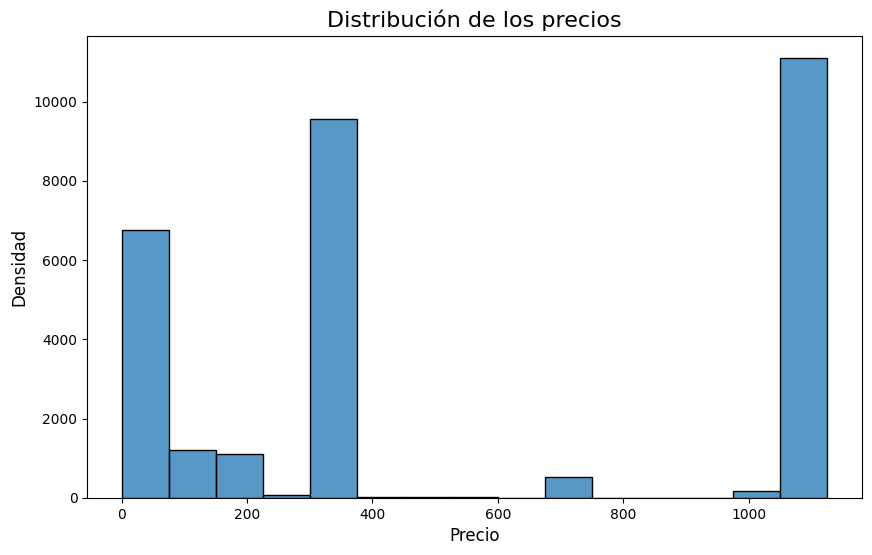

In [1381]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['maximum_nights'], bins=15)

plt.title('Distribución de los precios', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

plt.show()

In [1382]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_final['maximum_nights_scaled'] = scaler.fit_transform(df_final[['maximum_nights']])
df_final.drop('maximum_nights', axis=1, inplace=True)

In [1383]:
df_final.drop(['has_neighborhood_overview', 'has_neighbourhood_highlights'], axis=1, inplace=True)

Añado al dataset y le hago one hot encoding al agrupamiento de "neighbourhood_cleansed"

In [1384]:
cluster_labels = agrup_df_final[["neighbourhood_cleansed", "cluster"]]

df_final_v2 = df_final.merge(cluster_labels, on="neighbourhood_cleansed", how="left")

dummies = pd.get_dummies(df_final_v2['cluster'], drop_first=True)
dummies = dummies.astype(int)

df_final_v2 = pd.concat([df_final_v2.drop(['cluster'], axis=1), dummies], axis=1)

df_final_v2.drop('neighbourhood_cleansed', axis=1, inplace=True)

df_final_v2 = df_final_v2.rename(columns={
    1: 'neighbourhood_group_1',
    2: 'neighbourhood_group_2',
    3: 'neighbourhood_group_3'
})

#Modélo de Regresión Lineal

In [1385]:
df_final_v2.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'number_of_reviews', 'review_scores_rating', 'host_is_superhost',
       'has_license', 'has_description', 'has_review', 'minimum_nights_scaled',
       'is_instant_bookable', 'is_bathroom_shared', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_cleansed_Honolulu',
       'neighbourhood_group_cleansed_Kauai',
       'neighbourhood_group_cleansed_Maui', 'maximum_nights_scaled',
       'neighbourhood_group_1', 'neighbourhood_group_2',
       'neighbourhood_group_3'],
      dtype='object')

Con el análisis previo y teniendo en cuenta que un modélo de regresión lineal se puede ver afectado por la correlación de sus variables predictoras, la baja correalación de sus variables predictoras con la variable a predecir se decidio incluir las siguientes variables para el modelo.

In [1386]:
df_modelo_regresion = df_final_v2.copy()
df_modelo_regresion.drop(['beds','price', 'number_of_reviews', 'review_scores_rating', 'has_review'], axis=1, inplace=True)
df_modelo_regresion.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'host_is_superhost',
       'has_license', 'has_description', 'minimum_nights_scaled',
       'is_instant_bookable', 'is_bathroom_shared', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_cleansed_Honolulu',
       'neighbourhood_group_cleansed_Kauai',
       'neighbourhood_group_cleansed_Maui', 'maximum_nights_scaled',
       'neighbourhood_group_1', 'neighbourhood_group_2',
       'neighbourhood_group_3'],
      dtype='object')

In [1387]:
#Modelo Lineal
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Metricas para evaluar modelos
from sklearn import metrics

In [1388]:
#Doy el formato adecuado a las variables dependiente e independiente
x = df_modelo_regresion.values
y = df_final_v2['price'].values.reshape(-1, 1)

#separo el dataset train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

Creación y entrenamineto del modelo

In [1389]:
modelo_lineal_precio = LinearRegression()
modelo_lineal_precio.fit(x_train, y_train)

LinearRegression()

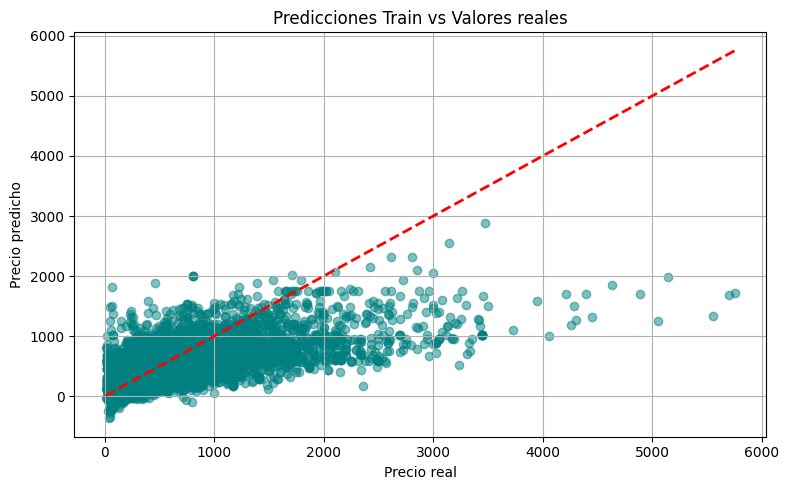

In [1390]:
y_pred = modelo_lineal_precio.predict(x_train)

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(y_train, y_pred, alpha=0.5, color='teal')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.title('Predicciones Train vs Valores reales')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1391]:
mse_RL_train = mean_squared_error(y_train, y_pred)
rmse_RL_train = np.sqrt(mean_squared_error(y_train, y_pred))
r2_RL_train = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse_RL_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_RL_train:.2f}")
print(f"R² Score: {r2_RL_train:.4f}")

Mean Squared Error (MSE): 83825.57
Root Mean Squared Error (RMSE): 289.53
R² Score: 0.4345


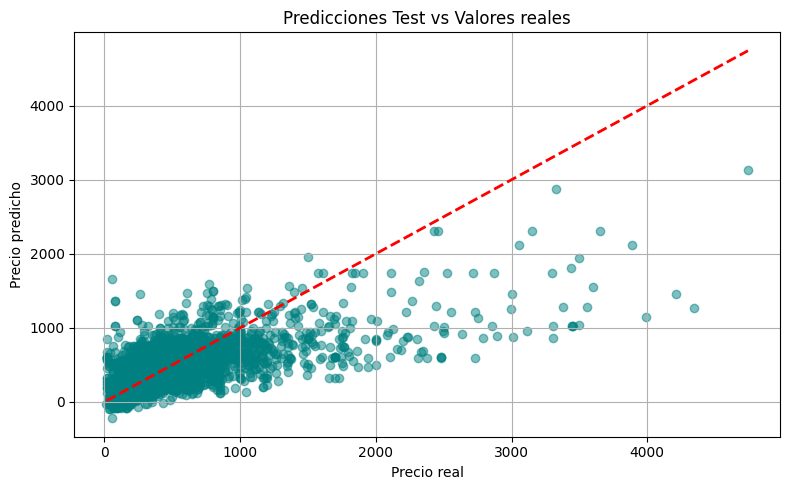

In [1392]:
y_pred = modelo_lineal_precio.predict(x_test)

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Predicciones Test vs Valores reales')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1393]:
# Métricas
mse_RL_test = mean_squared_error(y_test, y_pred)
rmse_RL_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_RL_test = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_RL_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_RL_test:.2f}")
print(f"R² Score: {r2_RL_test:.4f}")

Mean Squared Error (MSE): 83584.97
Root Mean Squared Error (RMSE): 289.11
R² Score: 0.4534


Viendo los gráficos podemos decir que el modelo tiende a fallar con los valores altos y estos son los que están perjudicando nuestro modelo.

Comparación resultados train y test

In [1394]:
resultados_train_test = pd.DataFrame({
    'Regresión Lineal': ['Train', 'Test'],
    'MSE': [mse_RL_train ,mse_RL_test,],
    'RMSE': [rmse_RL_train, rmse_RL_test],
    'R²': [r2_RL_train, r2_RL_test]
})


print(resultados_train_test)

  Regresión Lineal           MSE        RMSE        R²
0            Train  83825.569981  289.526458  0.434531
1             Test  83584.971138  289.110656  0.453432


Según R2 el modelo solo logra explicar aproximadamente el 43–45% de la variabilidad.Desempeño aceptable pero no muy alto. Puede que no haya relaciones completamente lineales.

los valores entre el conjunto de training y test son casi iguales. Él modelo generaliza bien el problema y no produce ni overfitting ni underfitting.

MSE y RMSE poco altos, puede haber outliers que perjudiquen la predicción.

#Modelo XGBoost

In [1395]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [1396]:
df_boost = df_final_v2.copy()
df_boost = df_boost.drop(columns=['price'])

df_boost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   accommodates                           30527 non-null  float64
 1   bathrooms                              30527 non-null  float64
 2   bedrooms                               30527 non-null  float64
 3   beds                                   30527 non-null  float64
 4   number_of_reviews                      30527 non-null  float64
 5   review_scores_rating                   30527 non-null  float64
 6   host_is_superhost                      30527 non-null  int64  
 7   has_license                            30527 non-null  int64  
 8   has_description                        30527 non-null  int64  
 9   has_review                             30527 non-null  int64  
 10  minimum_nights_scaled                  30527 non-null  float64
 11  is

In [1397]:
x = df_boost
y = df_final['price']

#separo el dataset train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

In [1398]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

Se utilizan 5 folds

In [1399]:
xgbr = XGBRegressor(random_state=0)

param_grid = {
    'n_estimators': [75, 150],
    'max_depth': [5, 10],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.5, 1.0]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgbr,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 10],
                         'n_estimators': [75, 150], 'subsample': [0.5, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

Se utiliza como métrica el RMSE (error cuadrático medio) a través del parámetro scoring='neg_mean_squared_error'. Ya que es más ...

In [1400]:
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 75, 'subsample': 0.5}


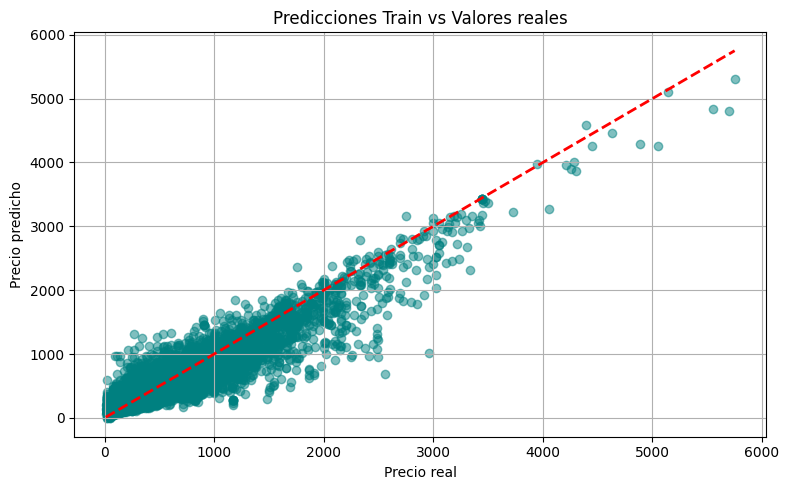

In [1401]:
y_pred = grid_search.best_estimator_.predict(x_train)

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(y_train, y_pred, alpha=0.5, color='teal')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.title('Predicciones Train vs Valores reales')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1402]:
# Métricas
mse_XGB_train = mean_squared_error(y_train, y_pred)
rmse_XGB_train = np.sqrt(mean_squared_error(y_train, y_pred))
r2_XGB_train = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse_XGB_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_XGB_train:.2f}")
print(f"R² Score: {r2_XGB_train:.4f}")

Mean Squared Error (MSE): 19825.76
Root Mean Squared Error (RMSE): 140.80
R² Score: 0.8663


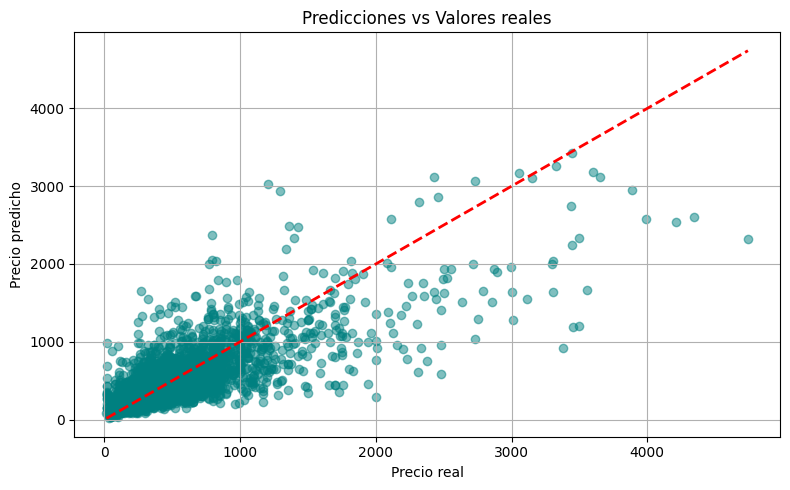

In [1403]:
y_pred = grid_search.best_estimator_.predict(x_test)

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Predicciones vs Valores reales')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1404]:
# Métricas
mse_XGB_test = mean_squared_error(y_test, y_pred)
rmse_XGB_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_XGB_test = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_XGB_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_XGB_test:.2f}")
print(f"R² Score: {r2_XGB_test:.4f}")

Mean Squared Error (MSE): 52929.83
Root Mean Squared Error (RMSE): 230.06
R² Score: 0.6539


Con los gráficos podemos ver que el conjunto de entrenamiento logra una predicción bastante uniforme. Y el conjunto de prueb a medida que los valores aumentan mayor es el error de predicción.

Comparación Train y Test

In [1405]:
resultados_train_test = pd.DataFrame({
    'XGBoost': ['Train', 'Test'],
    'MSE': [mse_XGB_train ,mse_XGB_test,],
    'RMSE': [rmse_XGB_train, rmse_XGB_test],
    'R²': [r2_XGB_train, r2_XGB_test]
})


print(resultados_train_test)

  XGBoost           MSE        RMSE        R²
0   Train  19825.758265  140.803971  0.866260
1    Test  52929.832612  230.064844  0.653888


Explica mejor la variabilidad del precio que la regresión lineal, 65% vs 43%.

Tambien reduce el error promedio de la predicción (230)

Hay un diferencia visible entre el conjunto de train y test. El modelo tiende a sobreajustar perdiendo algo de generalización. Leve overfitting

#Modélo a elección (Random Forest)

In [1406]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [1407]:
df_rf = df_final_v2.copy()
df_rf = df_rf.drop(columns=['price'])

df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   accommodates                           30527 non-null  float64
 1   bathrooms                              30527 non-null  float64
 2   bedrooms                               30527 non-null  float64
 3   beds                                   30527 non-null  float64
 4   number_of_reviews                      30527 non-null  float64
 5   review_scores_rating                   30527 non-null  float64
 6   host_is_superhost                      30527 non-null  int64  
 7   has_license                            30527 non-null  int64  
 8   has_description                        30527 non-null  int64  
 9   has_review                             30527 non-null  int64  
 10  minimum_nights_scaled                  30527 non-null  float64
 11  is

In [1408]:
x = df_boost
y = df_final['price']

#separo el dataset train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

In [1409]:
rf_model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configurar GridSearchCV con validación cruzada de 5 folds
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [1410]:
print("Mejores hiperparámetros:", grid_search_rf.best_params_)

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


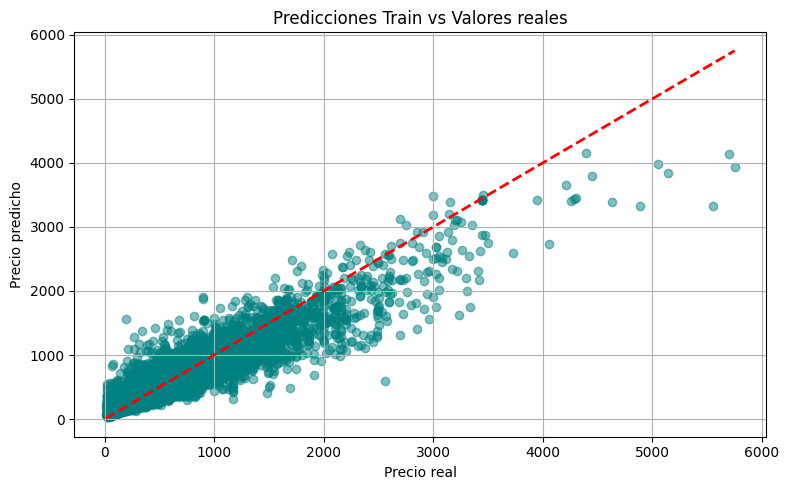

In [1411]:
y_pred = grid_search_rf.best_estimator_.predict(x_train)

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(y_train, y_pred, alpha=0.5, color='teal')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.title('Predicciones Train vs Valores reales')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1412]:
# Métricas
mse_RF_train = mean_squared_error(y_train, y_pred)
rmse_RF_train = np.sqrt(mean_squared_error(y_train, y_pred))
r2_RF_train = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse_RF_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_RF_train:.2f}")
print(f"R² Score: {r2_RF_train:.4f}")

Mean Squared Error (MSE): 18467.63
Root Mean Squared Error (RMSE): 135.90
R² Score: 0.8754


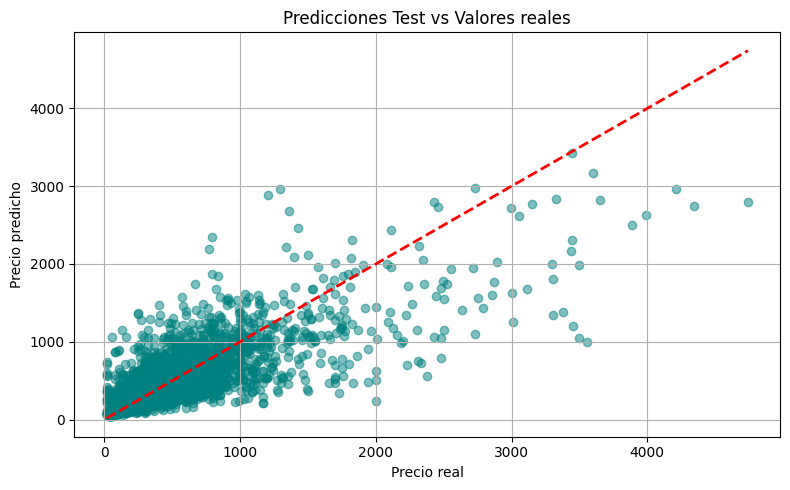

In [1413]:
y_pred = grid_search_rf.best_estimator_.predict(x_test)

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Predicciones Test vs Valores reales')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1414]:
# Métricas
mse_RF_test = mean_squared_error(y_test, y_pred)
rmse_RF_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_RF_test = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_RF_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_RF_test:.2f}")
print(f"R² Score: {r2_RF_test:.4f}")

Mean Squared Error (MSE): 54742.25
Root Mean Squared Error (RMSE): 233.97
R² Score: 0.6420


Comparación Train y Test

In [1415]:
resultados_train_test = pd.DataFrame({
    'Random Forest': ['Train', 'Test'],
    'MSE': [mse_RF_train ,mse_RF_test,],
    'RMSE': [rmse_RF_train, rmse_RF_test],
    'R²': [r2_RF_train, r2_RF_test]
})


print(resultados_train_test)

  Random Forest           MSE        RMSE        R²
0         Train  18467.628386  135.895653  0.875422
1          Test  54742.245354  233.970608  0.642037


Resultados muy similares al modelo XG Boost, esté último un poco mejor.

Pequeña tendencia al sobreajuste, leve overfitting.

#Cuadro de Resultado

In [1416]:
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'XGBoost Regressor', 'Random Forest Regressor'],
    'MSE': [mse_RL_test, mse_XGB_test, mse_RF_test],
    'RMSE': [rmse_RL_test, rmse_XGB_test, rmse_RF_test],
    'R²': [r2_RL_test, r2_XGB_test, r2_RF_test]
})


print(resultados)

                    Modelo           MSE        RMSE        R²
0         Regresión Lineal  83584.971138  289.110656  0.453432
1        XGBoost Regressor  52929.832612  230.064844  0.653888
2  Random Forest Regressor  54742.245354  233.970608  0.642037


Para predecir el precio de
alquiler elegimos el modélo XGBoost ya que es el modélo que mejor logra generalizar el problema y predecir los precios. Aunque la diferencia con Random Forest sea leve también tiene la ventaja de ser un modélo con un coste computacional inferior que permite que su entrenamiento sea bastante más rápido.